# Preparation of FAVA Matrices from Achilles

#### RawReadcounts

In [2]:
# read in AvanaRawReadcounts.csv and AvanaGuideMap.csv files
Avana_RawCounts = pd.read_csv('Achilles//KYRawReadcounts.csv', sep=",")
Avana_GuideMap = pd.read_csv('Achilles//KYGuideMap.csv', sep=",")

# merge Avana_RawCounts with Avana_GuideMap on 'sgRNA', while keeping only matches
# and remove the 'sgRNA' column
Avana_RawCounts = Avana_RawCounts.merge(Avana_GuideMap[['sgRNA', 'Gene']], on='sgRNA', how='left', suffixes=('', '_y'))
Avana_RawCounts = Avana_RawCounts[Avana_RawCounts['sgRNA'].isin(Avana_GuideMap[Avana_GuideMap['UsedByChronos'] == True]['sgRNA'])]
Avana_RawCounts = Avana_RawCounts.drop('sgRNA', axis=1)
d1 = Avana_RawCounts
# drop rows with missing 'Gene' values
Avana_RawCounts.dropna(subset=['Gene'], inplace=True)

# set the index of Avana_RawCounts to 'Gene'
Avana_RawCounts.set_index('Gene', drop=True, inplace=True)

# split the values in the index by "(" and keep only the first part, then set the new values as the new index
Avana_RawCounts_index = [i.split("(")[0].strip() for i in Avana_RawCounts.index]
Avana_RawCounts = Avana_RawCounts.set_index(pd.Index(Avana_RawCounts_index))

# group the data by gene and sum the values for each column
df_grouped = Avana_RawCounts.groupby(Avana_RawCounts.index).median()
d2 = df_grouped
# create a boolean mask for selecting columns without "pDNA"
mask = ~df_grouped.columns.str.contains("pDNA")

# select only the columns without "pDNA"
AvanaRawCounts_CorrelationMatrix = df_grouped.loc[:, mask]

#Save as txt
AvanaRawCounts_CorrelationMatrix.to_csv('Achilles_Matrices//KYRawCounts_CorrelationMatrix.txt',sep='\t')


In [5]:
Avana_RawCounts

,22RV1_c908R1_KY-1,22RV1_c908R2_KY-1,22RV1_c908R3_KY-1,231328_c908R1_KY-1,231328_c908R2_KY-1,231328_c908R3_KY-1,42MGBA_c907R1_KY-1,769P_c908R1_KY-1,769P_c908R2_KY-1,769P_c908R3_KY-1,...,UWB12_c905R2_KY-1,UWB12_c905R3_KY-1,YH13_c907R1_KY-1,YH13_c907R2_KY-1,no10_c907R1_KY-1,no10_c907R2_KY-1,no11_c907R1_KY-1,no11_c907R2_KY-1,pDNA_batch_KY-1,pDNA_batch_KY-2
A1BG,188.0,199.0,133.0,317.0,152.0,383.0,674.0,365.0,230.0,192.0,...,183.0,590.0,115.0,255.0,324.0,346.0,606.0,257.0,370,368
A1BG,100.0,86.0,220.0,250.0,451.0,190.0,587.0,252.0,169.0,67.0,...,549.0,197.0,36.0,516.0,238.0,271.0,286.0,137.0,485,424
A1BG,278.0,224.0,278.0,500.0,433.0,694.0,857.0,341.0,297.0,247.0,...,415.0,252.0,313.0,1260.0,499.0,473.0,320.0,226.0,405,580
A1BG,454.0,448.0,542.0,666.0,1427.0,1110.0,1784.0,792.0,710.0,585.0,...,832.0,580.0,554.0,580.0,824.0,1150.0,1126.0,762.0,615,803
A1BG,202.0,198.0,492.0,532.0,445.0,409.0,945.0,433.0,523.0,201.0,...,390.0,573.0,235.0,219.0,610.0,579.0,493.0,319.0,562,1122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,65.0,53.0,97.0,94.0,130.0,118.0,136.0,117.0,45.0,36.0,...,135.0,142.0,135.0,7.0,18.0,169.0,140.0,22.0,181,65
ZZZ3,215.0,175.0,431.0,236.0,260.0,222.0,219.0,330.0,120.0,150.0,...,382.0,277.0,94.0,142.0,167.0,114.0,216.0,80.0,500,319
ZZZ3,294.0,258.0,339.0,757.0,497.0,472.0,288.0,401.0,243.0,165.0,...,431.0,472.0,395.0,880.0,323.0,455.0,412.0,199.0,573,274
ZZZ3,174.0,142.0,332.0,347.0,313.0,272.0,470.0,171.0,117.0,106.0,...,296.0,294.0,488.0,486.0,204.0,167.0,219.0,213.0,481,295


In [ ]:
# read in AvanaRawReadcounts.csv and AvanaGuideMap.csv files
Avana_RawCounts = pd.read_csv('Achilles//AvanaRawReadcounts.csv', sep=",")
Avana_GuideMap = pd.read_csv('Achilles//AvanaGuideMap.csv', sep=",")

# merge Avana_RawCounts with Avana_GuideMap on 'sgRNA', while keeping only matches
# and remove the 'sgRNA' column
Avana_RawCounts = Avana_RawCounts.merge(Avana_GuideMap[['sgRNA', 'Gene']], on='sgRNA', how='left', suffixes=('', '_y'))
Avana_RawCounts = Avana_RawCounts[Avana_RawCounts['sgRNA'].isin(Avana_GuideMap[Avana_GuideMap['UsedByChronos'] == True]['sgRNA'])]
Avana_RawCounts = Avana_RawCounts.drop('sgRNA', axis=1)
d1 = Avana_RawCounts
# drop rows with missing 'Gene' values
Avana_RawCounts.dropna(subset=['Gene'], inplace=True)

# set the index of Avana_RawCounts to 'Gene'
Avana_RawCounts.set_index('Gene', drop=True, inplace=True)

# split the values in the index by "(" and keep only the first part, then set the new values as the new index
Avana_RawCounts_index = [i.split("(")[0].strip() for i in Avana_RawCounts.index]
Avana_RawCounts = Avana_RawCounts.set_index(pd.Index(Avana_RawCounts_index))

# group the data by gene and sum the values for each column
df_grouped = Avana_RawCounts.groupby(Avana_RawCounts.index).median()
d2 = df_grouped
# create a boolean mask for selecting columns without "pDNA"
mask = ~df_grouped.columns.str.contains("pDNA")

# select only the columns without "pDNA"
AvanaRawCounts_CorrelationMatrix = df_grouped.loc[:, mask]

#Save as txt
AvanaRawCounts_CorrelationMatrix.to_csv('Achilles_Matrices//AvanaRawCounts_CorrelationMatrix.txt',sep='\t')


#### AvanaLogFoldchange

In [25]:
# read in AvanaRawReadcounts.csv and AvanaGuideMap.csv files
Avana_LogFoldchange = pd.read_csv('Achilles//KYLogfoldChange.csv', sep=",")
Avana_GuideMap = pd.read_csv('Achilles//KYGuideMap.csv', sep=",")

# merge Avana_RawCounts with Avana_GuideMap on 'sgRNA', while keeping only matches
# and remove the 'sgRNA' column
Avana_LogFoldchange = Avana_LogFoldchange.merge(Avana_GuideMap[['sgRNA', 'Gene']], on='sgRNA', how='left', suffixes=('', '_y'))
Avana_LogFoldchange = Avana_LogFoldchange[Avana_LogFoldchange['sgRNA'].isin(Avana_GuideMap[Avana_GuideMap['UsedByChronos'] == True]['sgRNA'])]

Avana_LogFoldchange = Avana_LogFoldchange.drop('sgRNA', axis=1)

# drop rows with missing 'Gene' values
Avana_LogFoldchange.dropna(subset=['Gene'], inplace=True)

# set the index of Avana_RawCounts to 'Gene'
Avana_LogFoldchange.set_index('Gene', drop=True, inplace=True)

# split the values in the index by "(" and keep only the first part, then set the new values as the new index
Avana_LogFoldchange_index = [i.split("(")[0].strip() for i in Avana_LogFoldchange.index]
Avana_LogFoldchange = Avana_LogFoldchange.set_index(pd.Index(Avana_LogFoldchange_index))

# Group the data by gene and calculate the median values for each column
df_grouped = Avana_LogFoldchange.groupby(Avana_LogFoldchange.index).median()

# Create a boolean mask for selecting columns without "pDNA"
mask = ~df_grouped.columns.str.contains("pDNA")

# Select only the columns without "pDNA"
AvanaLogFoldchange_CorrelationMatrix = df_grouped.loc[:, mask]

#Save as txt
AvanaLogFoldchange_CorrelationMatrix.to_csv('Achilles_Matrices//KYLogFoldchange_CorrelationMatrix.txt',sep='\t')


In [ ]:
# read in AvanaRawReadcounts.csv and AvanaGuideMap.csv files
Avana_LogFoldchange = pd.read_csv('Achilles//AvanaLogfoldChange.csv', sep=",")
Avana_GuideMap = pd.read_csv('Achilles//AvanaGuideMap.csv', sep=",")

# merge Avana_RawCounts with Avana_GuideMap on 'sgRNA', while keeping only matches
# and remove the 'sgRNA' column
Avana_LogFoldchange = Avana_LogFoldchange.merge(Avana_GuideMap[['sgRNA', 'Gene']], on='sgRNA', how='left', suffixes=('', '_y'))
Avana_LogFoldchange = Avana_LogFoldchange[Avana_LogFoldchange['sgRNA'].isin(Avana_GuideMap[Avana_GuideMap['UsedByChronos'] == True]['sgRNA'])]

Avana_LogFoldchange = Avana_LogFoldchange.drop('sgRNA', axis=1)

# drop rows with missing 'Gene' values
Avana_LogFoldchange.dropna(subset=['Gene'], inplace=True)

# set the index of Avana_RawCounts to 'Gene'
Avana_LogFoldchange.set_index('Gene', drop=True, inplace=True)

# split the values in the index by "(" and keep only the first part, then set the new values as the new index
Avana_LogFoldchange_index = [i.split("(")[0].strip() for i in Avana_LogFoldchange.index]
Avana_LogFoldchange = Avana_LogFoldchange.set_index(pd.Index(Avana_LogFoldchange_index))

# Group the data by gene and calculate the median values for each column
df_grouped = Avana_LogFoldchange.groupby(Avana_LogFoldchange.index).median()

# Create a boolean mask for selecting columns without "pDNA"
mask = ~df_grouped.columns.str.contains("pDNA")

# Select only the columns without "pDNA"
AvanaLogFoldchange_CorrelationMatrix = df_grouped.loc[:, mask]

#Save as txt
AvanaLogFoldchange_CorrelationMatrix.to_csv('Achilles_Matrices//AvanaLogFoldchange_CorrelationMatrix.txt',sep='\t')


#### AvanaGeneEffect

In [7]:
# Load the initial CSV file
NaiveAchilles = pd.read_csv("Achilles//ScreenNaiveGeneScore.csv", sep=',', index_col=0)

# Transpose the DataFrame and clean the index
NaiveAchilles = NaiveAchilles.transpose()
new_index = [i.split("(")[0].strip() for i in NaiveAchilles.index]
df = NaiveAchilles.set_index(pd.Index(new_index))

# Save the final result to the same file
df.to_csv('Achilles_Matrices//ScreenNaiveGeneScore_CorrelationMatrix.txt', sep='\t')


#### GeneDependency

In [8]:
# Load the initial CSV file
NaiveAchilles = pd.read_csv("Achilles//ScreenGeneDependency.csv", sep=',', index_col=0)

# Transpose the DataFrame and clean the index
NaiveAchilles = NaiveAchilles.transpose()
new_index = [i.split("(")[0].strip() for i in NaiveAchilles.index]
df = NaiveAchilles.set_index(pd.Index(new_index))

# Save the final result to the same file
df.to_csv('Achilles_Matrices//ScreenGeneDependency_CorrelationMatrix.txt', sep='\t')

In [3]:
# Load the initial CSV file
NaiveAchilles = pd.read_csv("Achilles//CRISPRGeneDependency.csv", sep=',', index_col=0)

# Transpose the DataFrame and clean the index
NaiveAchilles = NaiveAchilles.transpose()
new_index = [i.split("(")[0].strip() for i in NaiveAchilles.index]
df = NaiveAchilles.set_index(pd.Index(new_index))

# Save the final result to the same file
df.to_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t')

In [3]:
# Load the initial CSV file
NaiveAchilles = pd.read_csv("Achilles//CRISPRGeneEffect.csv", sep=',', index_col=0)

# Transpose the DataFrame and clean the index
NaiveAchilles = NaiveAchilles.transpose()
new_index = [i.split("(")[0].strip() for i in NaiveAchilles.index]
df = NaiveAchilles.set_index(pd.Index(new_index))

# Save the final result to the same file
df.to_csv('Achilles_Matrices//CRISPRGeneEffect_CorrelationMatrix.csv', sep='\t')

#### Adjacency Matrices

In [3]:
df1 = pd.read_csv('Achilles_Matrices//AvanaRawCounts_CorrelationMatrix.txt', sep='\t', index_col = 0)
df2  = pd.read_csv('Achilles_Matrices//AvanaLogFoldchange_CorrelationMatrix.txt', sep='\t', index_col = 0)
df3  = pd.read_csv('Achilles_Matrices//ScreenNaiveGeneScore_CorrelationMatrix.txt', sep='\t', index_col = 0)
df4  = pd.read_csv('Achilles_Matrices//ScreenGeneDependency_CorrelationMatrix.txt', sep='\t', index_col = 0)

In [34]:
from scipy.spatial.distance import pdist, squareform

def Adjacency_Matrix(data, sample=0):
    df = pd.DataFrame(data.iloc[:,sample])
    dist = pdist(df.values, metric='euclidean')
    zeros_df = pd.DataFrame(squareform(dist), index=df.index, columns=df.index)
    return zeros_df

Adj = Adjacency_Matrix(df4)


In [36]:
%%capture --no-display

!pip install favapy
!Rscript -e 'install.packages("plotly", repos="https://cloud.r-project.org")'
!Rscript -e 'install.packages("igraph", repos="https://cloud.r-project.org")'
!Rscript -e 'install.packages("cowplot", repos="https://cloud.r-project.org")'

In [37]:
import os 
import pandas as pd
import itertools
import csv
import numpy as np 
from favapy import fava


def Annot_network(network = 'Homo_Sapiens_Scaled.txt',alias = "STRING proteins//9606.protein.aliases.v11.5.txt"):
    dict = {}
    with open(alias) as f:
        next(f)
        for line in f:
            a = line.split("\t")
            dict[a[1]] = a[0]
    network = pd.read_csv(network,sep="\t", header = 0)

    identifiers_1 = [dict.get(key) for key in network.iloc[:,1]]
    identifiers_1_df = pd.DataFrame(identifiers_1)

    identifiers_2 = [dict.get(key) for key in network.iloc[:,2]]
    identifiers_2_df = pd.DataFrame(identifiers_2)

    network_ensps = pd.concat([identifiers_1_df,identifiers_2_df],axis=1)
    final_pairs = pd.concat([network_ensps,network.iloc[:,3]],axis=1)
    final_network = final_pairs.dropna()
    
    return final_network

def CommandLineAchilles():
    !awk -F"\t" '{print $0, "FAVA"}' 'Networks//Homo_Sapiens.tsv' > tmp.tsv && mv tmp.tsv 'Dummies//Homo_Sapiens.tsv'
    !awk '{print $2,$3,$4,$5}' 'Dummies//Homo_Sapiens.tsv' > 'Dummies//Homo_Sapiens2.tsv'
    !python3 string_score_benchmark.py 'Dummies//Homo_Sapiens2.tsv' 'kegg_benchmarking.CONN_maps_in.v12.9606.tsv' 'none' > 'Benchmark_Kegg_Networks//Achilles_benchmark_kegg.tsv'
    return

def CommandLinePearson():
    !awk -F"\t" '{print $0, "FAVA"}' 'Networks//Homo_Sapiens.tsv' > tmp.tsv && mv tmp.tsv 'Dummies//Homo_Sapiens.tsv'
    !awk '{print $2,$3,$4,$5}' 'Dummies//Homo_Sapiens.tsv' > 'Dummies//Homo_Sapiens2.tsv'
    !python3 string_score_benchmark.py 'Dummies//Homo_Sapiens2.tsv' 'kegg_benchmarking.CONN_maps_in.v12.9606.tsv' 'none' > 'Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv'
    return

In [48]:
FAVA_Matrix = Adj
def FAVA(data):

    my_FAVAourite_network = fava.cook(data = data,
                                  log2_normalization = False, # If your data are normalized set this to False
                                  hidden_layer = 1000, # If None, it will be adjusted base on the input size.
                                  latent_dim = 100, # If None, it will be adjusted base on the size of the hidden layer.
                                  epochs = 10, 
                                  batch_size = 32,
                                  PCC_cutoff = 0.95) # This is arbitraty. We need to plot the score distribution.
    return my_FAVAourite_network

In [ ]:
Network = FAVA(FAVA_Matrix)
Network

Epoch 1/10
561/561 [==============================] - 220s 388ms/step - loss: 60.3651 - accuracy: 0.0141 - val_loss: 13.1131 - val_accuracy: 0.0203
Epoch 2/10
561/561 [==============================] - 214s 382ms/step - loss: 6.9032 - accuracy: 0.0198 - val_loss: 2.6715 - val_accuracy: 0.0260
Epoch 3/10
561/561 [==============================] - 214s 381ms/step - loss: 5.9325 - accuracy: 0.0323 - val_loss: 4.2566 - val_accuracy: 0.0610
Epoch 4/10
561/561 [==============================] - 213s 380ms/step - loss: 4.5089 - accuracy: 0.0303 - val_loss: 1.8602 - val_accuracy: 0.0178
Epoch 5/10
561/561 [==============================] - 211s 376ms/step - loss: 2.8973 - accuracy: 0.0329 - val_loss: 2.2672 - val_accuracy: 0.0098
Epoch 6/10
419/561 [=====================>........] - ETA: 47s - loss: 2.3814 - accuracy: 0.0113

In [ ]:
Network = Network[Network['Protein_1'] != Network['Protein_2']]
Network = Network.nlargest(100000, 'Score')
Network.to_csv('Networks//Achilles.txt',sep='\t')
final_network = Annot_network('Networks//Achilles.txt',"STRING proteins//9606.protein.aliases.v11.5.txt")
final_network.to_csv('Networks//Homo_Sapiens.tsv',sep='\t',header = False)
CommandLineAchilles()
!Rscript benchmark_plot_coX.R 'Benchmark_Kegg_Networks//Achilles_benchmark_kegg.tsv' 'Roc_png//Achilles_benchmark_kegg2.png' 
from IPython.display import Image
Image("Roc_png//Achilles_benchmark_kegg2.png")

#### Filtering

In [8]:
AvanaRaw = pd.read_csv('Achilles_Matrices//AvanaRawCounts_CorrelationMatrix.txt', sep='\t', index_col = 0)
AvanaLF = pd.read_csv('Achilles_Matrices//AvanaLogFoldchange_CorrelationMatrix.txt', sep='\t', index_col = 0)
ScreenSequenceMap = pd.read_csv('Achilles//ScreenSequenceMap.csv', sep=',', index_col = 0)
AchillesScreenQCReport = pd.read_csv('Achilles//AchillesScreenQCReport.csv', sep=',', index_col = 0)
AchillesSequenceQCReport = pd.read_csv('Achilles//AchillesSequenceQCReport.csv', sep=',', index_col = 0)
AchillesHighVarianceGeneControls = pd.read_csv('Achilles//AchillesHighVarianceGeneControls.csv', sep=',', index_col = 0)

In [113]:
AvanaRaw = pd.read_csv('Achilles_Matrices//AvanaRawCounts_CorrelationMatrix.txt', sep='\t', index_col = 0)

# Step 1: Identify row names with False in ScreenPassesQC column
failed_rows = AchillesSequenceQCReport[AchillesSequenceQCReport['SequenceFingerprintPass'] != True].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)

# Step 1: Identify row names with False in ScreenPassesQC column
failed_rows = AchillesSequenceQCReport[AchillesSequenceQCReport['ScreenPassesQC'] != True].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)

# Step 1: Identify row names with False in ScreenPassesQC column
failed_rows = AchillesSequenceQCReport[AchillesSequenceQCReport['QCStatus'] != 'PASS'].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)

# Example DataFrames
df_a = AvanaRaw
df_b = ScreenSequenceMap

# Iterate over the column names of DataFrame A
for col_name in df_a.columns:
    # Find the matching row in DataFrame B
    matching_row = df_b[df_b.index == col_name]

    if len(matching_row) == 1:
        # Get the corresponding Screen_ID value
        screen_id = matching_row['ScreenID'].iloc[0]

        # Rename the column in DataFrame A
        df_a.rename(columns={col_name: screen_id}, inplace=True)
        

# Step 1: Identify row names with False in PassesQC column
failed_rows = AchillesScreenQCReport[AchillesScreenQCReport['QCStatus'] != 'PASS'].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)
AvanaRaw = AvanaRaw[~AvanaRaw.index.str.contains('INTERGENIC')]

AvanaRaw.to_csv('Achilles_Matrices//AvanaRaw_Filtered_CorrelationMatrix.txt',sep='\t')

In [9]:
AvanaRaw = pd.read_csv('Achilles_Matrices//AvanaLogFoldchange_CorrelationMatrix.txt', sep='\t', index_col = 0)

# Step 1: Identify row names with False in ScreenPassesQC column
failed_rows = AchillesSequenceQCReport[AchillesSequenceQCReport['SequenceFingerprintPass'] != True].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)

# Step 1: Identify row names with False in ScreenPassesQC column
failed_rows = AchillesSequenceQCReport[AchillesSequenceQCReport['ScreenPassesQC'] != True].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)

# Step 1: Identify row names with False in ScreenPassesQC column
failed_rows = AchillesSequenceQCReport[AchillesSequenceQCReport['QCStatus'] != 'PASS'].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)

# Example DataFrames
df_a = AvanaRaw
df_b = ScreenSequenceMap

# Iterate over the column names of DataFrame A
for col_name in df_a.columns:
    # Find the matching row in DataFrame B
    matching_row = df_b[df_b.index == col_name]

    if len(matching_row) == 1:
        # Get the corresponding Screen_ID value
        screen_id = matching_row['ScreenID'].iloc[0]

        # Rename the column in DataFrame A
        df_a.rename(columns={col_name: screen_id}, inplace=True)
        

# Step 1: Identify row names with False in PassesQC column
failed_rows = AchillesScreenQCReport[AchillesScreenQCReport['QCStatus'] != 'PASS'].index

# Step 2: Find matching column names in AvanaRaw
matching_columns = [col for col in AvanaRaw.columns if col in failed_rows]

# Step 3: Remove identified columns from AvanaRaw
AvanaRaw = AvanaRaw.drop(matching_columns, axis=1)
AvanaRaw = AvanaRaw[~AvanaRaw.index.str.contains('INTERGENIC')]

AvanaRaw.to_csv('Achilles_Matrices//AvanaLF_Filtered_CorrelationMatrix.txt',sep='\t')

#### Essential Genes Subset

In [5]:
import pandas as pd
AvanaRaw = pd.read_csv('Achilles_Matrices//AvanaRawCounts_CorrelationMatrix.txt', sep='\t', index_col = 0)
AvanaLF = pd.read_csv('Achilles_Matrices//AvanaLogFoldchange_CorrelationMatrix.txt', sep='\t', index_col = 0)
GeneDep = pd.read_csv('Achilles_Matrices//ScreenGeneDependency_CorrelationMatrix.txt', sep='\t', index_col = 0)
NaiveGene = pd.read_csv('Achilles_Matrices//ScreenNaiveGeneScore_CorrelationMatrix.txt', sep='\t', index_col = 0)

AvanaCommonEssentialControls = pd.read_csv('Achilles/AchillesHighVarianceGeneControls.csv', sep=",")
df1 = [i.split("(")[0].strip() for i in AvanaCommonEssentialControls['Gene']]
AvanaCommonEssentialControls['Gene'] = df1

AvanaRaw = AvanaRaw[AvanaRaw.index.isin(AvanaCommonEssentialControls['Gene'])]
AvanaLF = AvanaLF[AvanaLF.index.isin(AvanaCommonEssentialControls['Gene'])]
GeneDep = GeneDep[GeneDep.index.isin(AvanaCommonEssentialControls['Gene'])]
NaiveGene = NaiveGene[NaiveGene.index.isin(AvanaCommonEssentialControls['Gene'])]

AvanaRaw.to_csv('Achilles_Matrices//AvanaRaw_HighVarianceGene_CorrelationMatrix.txt',sep='\t')
AvanaLF.to_csv('Achilles_Matrices//AvanaLF_HighVarianceGene_CorrelationMatrix.txt',sep='\t')
GeneDep.to_csv('Achilles_Matrices//GeneDep_HighVarianceGene_CorrelationMatrix.txt',sep='\t')
NaiveGene.to_csv('Achilles_Matrices//NaiveGene_HighVarianceGene_CorrelationMatrix.txt',sep='\t')

# Data Investigation

#### DownSampling (Cell lines)

In [4]:
Model = pd.read_csv('Achilles//Model.csv', sep=',', index_col = 0)
Map = pd.read_csv('Achilles//CRISPRScreenMap.csv', sep=',', index_col = 0)
ModelCondition = pd.read_csv('Achilles//ModelCondition.csv', sep=',', index_col = 0)


In [10]:
import pandas as pd

# Assuming your dataframe is called 'df' and the column name is 'CellLineName'
cell_line_counts = Model['OncotreePrimaryDisease'].value_counts().reset_index()
cell_line_counts.columns = ['OncotreePrimaryDisease', 'Count']
cell_line_counts = cell_line_counts.sort_values('Count', ascending=False)
cell_line_counts

,OncotreePrimaryDisease,Count
0,Non-Small Cell Lung Cancer,155
1,Non-Hodgkin Lymphoma,145
2,Non-Cancerous,106
3,Melanoma,103
4,Diffuse Glioma,92
...,...,...
66,Chordoma,1
65,Acute Leukemias of Ambiguous Lineage,1
64,Small Cell Carcinoma of the Cervix,1
63,Extra Gonadal Germ Cell Tumor,1


In [46]:
FAVA_Matrix = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col = 0)

filtered_df1 = Model[Model['OncotreePrimaryDisease'] != 'Non-Cancerous']
filtered_df2 = Model[Model['OncotreePrimaryDisease'] != 'Non-Small Cell Lung Cancer']
filtered_df3 = Model[Model['OncotreePrimaryDisease'] != 'Non-Hodgkin Lymphoma']
filtered_df4 = Model[Model['OncotreePrimaryDisease'] != 'Melanoma']
filtered_df5 = Model[Model['OncotreePrimaryDisease'] != 'Diffuse Glioma']

# Assuming 'filtered_df' is the filtered dataframe from the previous step
# Assuming 'FAVA_Matrix' is the other dataframe with column names to match

filtered_row_names1 = set(filtered_df1.index)
filtered_row_names2 = set(filtered_df2.index)
filtered_row_names3 = set(filtered_df3.index)
filtered_row_names4 = set(filtered_df4.index)
filtered_row_names5 = set(filtered_df5.index)

matching_columns = list(filtered_row_names1.intersection(FAVA_Matrix.columns))
FAVA_Matrix = FAVA_Matrix[matching_columns]
matching_columns = list(filtered_row_names2.intersection(FAVA_Matrix.columns))
FAVA_Matrix = FAVA_Matrix[matching_columns]
matching_columns = list(filtered_row_names3.intersection(FAVA_Matrix.columns))
FAVA_Matrix = FAVA_Matrix[matching_columns]
matching_columns = list(filtered_row_names4.intersection(FAVA_Matrix.columns))
FAVA_Matrix = FAVA_Matrix[matching_columns]
matching_columns = list(filtered_row_names5.intersection(FAVA_Matrix.columns))
FAVA_Matrix = FAVA_Matrix[matching_columns]



,ACH-001694,ACH-001556,ACH-001692,ACH-000265,ACH-000600,ACH-000746,ACH-000151,ACH-001400,ACH-000202,ACH-000970,...,ACH-000593,ACH-000783,ACH-000076,ACH-000466,ACH-000228,ACH-000905,ACH-001793,ACH-001192,ACH-001307,ACH-001698
A1BG,0.035470,0.090622,0.030665,0.008512,0.018940,0.031172,0.026215,0.043402,0.012175,0.008879,...,0.081430,0.213190,0.024506,0.035421,0.008133,0.020786,0.043959,0.022714,0.017075,0.021172
A1CF,0.009359,0.032738,0.026449,0.025225,0.025182,0.042566,0.028219,0.148409,0.073579,0.092723,...,0.046107,0.035231,0.025043,0.032746,0.073621,0.085788,0.022542,0.076323,0.039433,0.022494
A2M,0.002889,0.005420,0.006986,0.007879,0.011729,0.013680,0.009584,0.005959,0.042142,0.138897,...,0.012990,0.015444,0.008283,0.059176,0.011341,0.012628,0.013786,0.084885,0.007034,0.005661
A2ML1,0.002758,0.001653,0.002311,0.007215,0.015625,0.003429,0.002265,0.001396,0.013380,0.001533,...,0.001867,0.006146,0.071967,0.012460,0.016651,0.008047,0.010852,0.033132,0.004635,0.007000
A3GALT2,0.050161,0.057073,0.123604,0.018719,0.092527,0.052471,0.663391,0.012728,0.044896,0.029851,...,0.074727,0.103869,0.009017,0.050787,0.043754,0.041414,0.074424,0.018867,0.029544,0.051570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.021307,0.007336,0.026951,0.008731,0.020191,0.042265,0.007010,0.093106,0.033319,0.012456,...,0.013705,0.030039,0.006669,0.064304,0.010761,0.004968,0.019947,0.004211,0.037029,0.004894
ZYG11B,0.143596,0.047201,0.138088,0.058921,0.073509,0.016007,0.011988,0.100741,0.101789,0.069052,...,0.167097,0.057925,0.042870,0.070576,0.193514,0.172883,0.097481,0.225449,0.055525,0.248861
ZYX,0.017453,0.027792,0.030226,0.006399,0.030342,0.066197,0.009732,0.029938,0.010843,0.003787,...,0.058938,0.349197,0.007969,0.033370,0.020387,0.002464,0.075737,0.017229,0.076952,0.002934
ZZEF1,0.020491,0.033918,0.081709,0.024526,0.067929,0.028371,0.485549,0.049939,0.027115,0.071911,...,0.029137,0.071472,0.270457,0.122077,0.034742,0.075261,0.066169,0.076802,0.018007,0.067952


#### PCA analysis

In [8]:
!pip install numpy scikit-learn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.7 MB/s eta 0:00:0000:01


In [99]:
import pandas as pd

# Assuming your dataframe is called 'df' and the column name is 'CellLineName'
cell_line_counts = Model['OncotreePrimaryDisease'].value_counts().reset_index()
cell_line_counts.columns = ['OncotreePrimaryDisease', 'Count']
cell_line_counts = cell_line_counts.sort_values('Count', ascending=False)
cell_line_counts

,OncotreePrimaryDisease,Count
0,Non-Small Cell Lung Cancer,155
1,Non-Hodgkin Lymphoma,145
2,Non-Cancerous,106
3,Melanoma,103
4,Diffuse Glioma,92
...,...,...
66,Chordoma,1
65,Acute Leukemias of Ambiguous Lineage,1
64,Small Cell Carcinoma of the Cervix,1
63,Extra Gonadal Germ Cell Tumor,1


In [9]:
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)
df

,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,...,ACH-002687,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002926
A1BG,0.055321,0.023418,0.059552,0.023880,0.027652,0.011752,0.054350,0.012408,0.040318,0.048144,...,0.052761,0.047661,0.045288,0.058705,0.048792,0.019522,0.035125,0.032003,0.024223,0.031844
A1CF,0.014039,0.048724,0.025478,0.035082,0.074860,0.018515,0.012480,0.056549,0.060836,0.019915,...,0.024764,0.134459,0.038412,0.041521,0.019704,0.048489,0.054841,0.045283,0.011662,0.030943
A2M,0.014084,0.058084,0.009989,0.006556,0.011021,0.006061,0.007296,0.017932,0.006576,0.015796,...,0.004601,0.042589,0.007726,0.011676,0.011127,0.003258,0.015211,0.014737,0.012255,0.005662
A2ML1,0.033828,0.019483,0.008775,0.004322,0.009153,0.001281,0.004775,0.006095,0.004405,0.003001,...,0.001275,0.003605,0.011175,0.008310,0.009530,0.008269,0.016620,0.010463,0.000397,0.002768
A3GALT2,0.049511,0.049793,0.099322,0.022200,0.021632,0.069164,0.017181,0.087864,0.028969,0.032881,...,0.048573,0.032802,0.098049,0.173271,0.093615,0.203445,0.154514,0.086174,0.135939,0.082585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.154849,0.015507,0.097357,0.029261,0.053355,0.011182,0.011567,0.034543,0.017696,0.010675,...,0.028127,0.175865,0.037863,0.050344,0.039956,0.032515,0.020362,0.037763,0.034875,0.016419
ZYG11B,0.015792,0.319598,0.066269,0.369101,0.651365,0.096540,0.036698,0.047371,0.070336,0.068188,...,0.172399,0.208043,0.075282,0.134294,0.089663,0.155789,0.017330,0.145848,0.177452,0.157046
ZYX,0.015999,0.007778,0.025365,0.015412,0.012016,0.012946,0.064189,0.031213,0.037093,0.066161,...,0.106191,0.019738,0.221027,0.066985,0.046708,0.037765,0.224894,0.138299,0.056826,0.007495
ZZEF1,0.006200,0.004392,0.042530,0.165622,0.023990,0.050701,0.037076,0.068899,0.002413,0.051896,...,0.034599,0.112035,0.023734,0.068914,0.007272,0.034490,0.054621,0.053118,0.013545,0.052518


In [10]:
import pandas as pd
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)
df = df.dropna()
# Assuming your DataFrame is named df
total_values = df.size
nan_values = df.isna().sum().sum()

nan_fraction = nan_values / total_values
print(nan_values)
print(total_values)
print(nan_fraction)
df_imputed

0
18836190
0.0


NameError: name 'df_imputed' is not defined

Explained Variance Ratio:
PC1: 0.0788
PC2: 0.0438


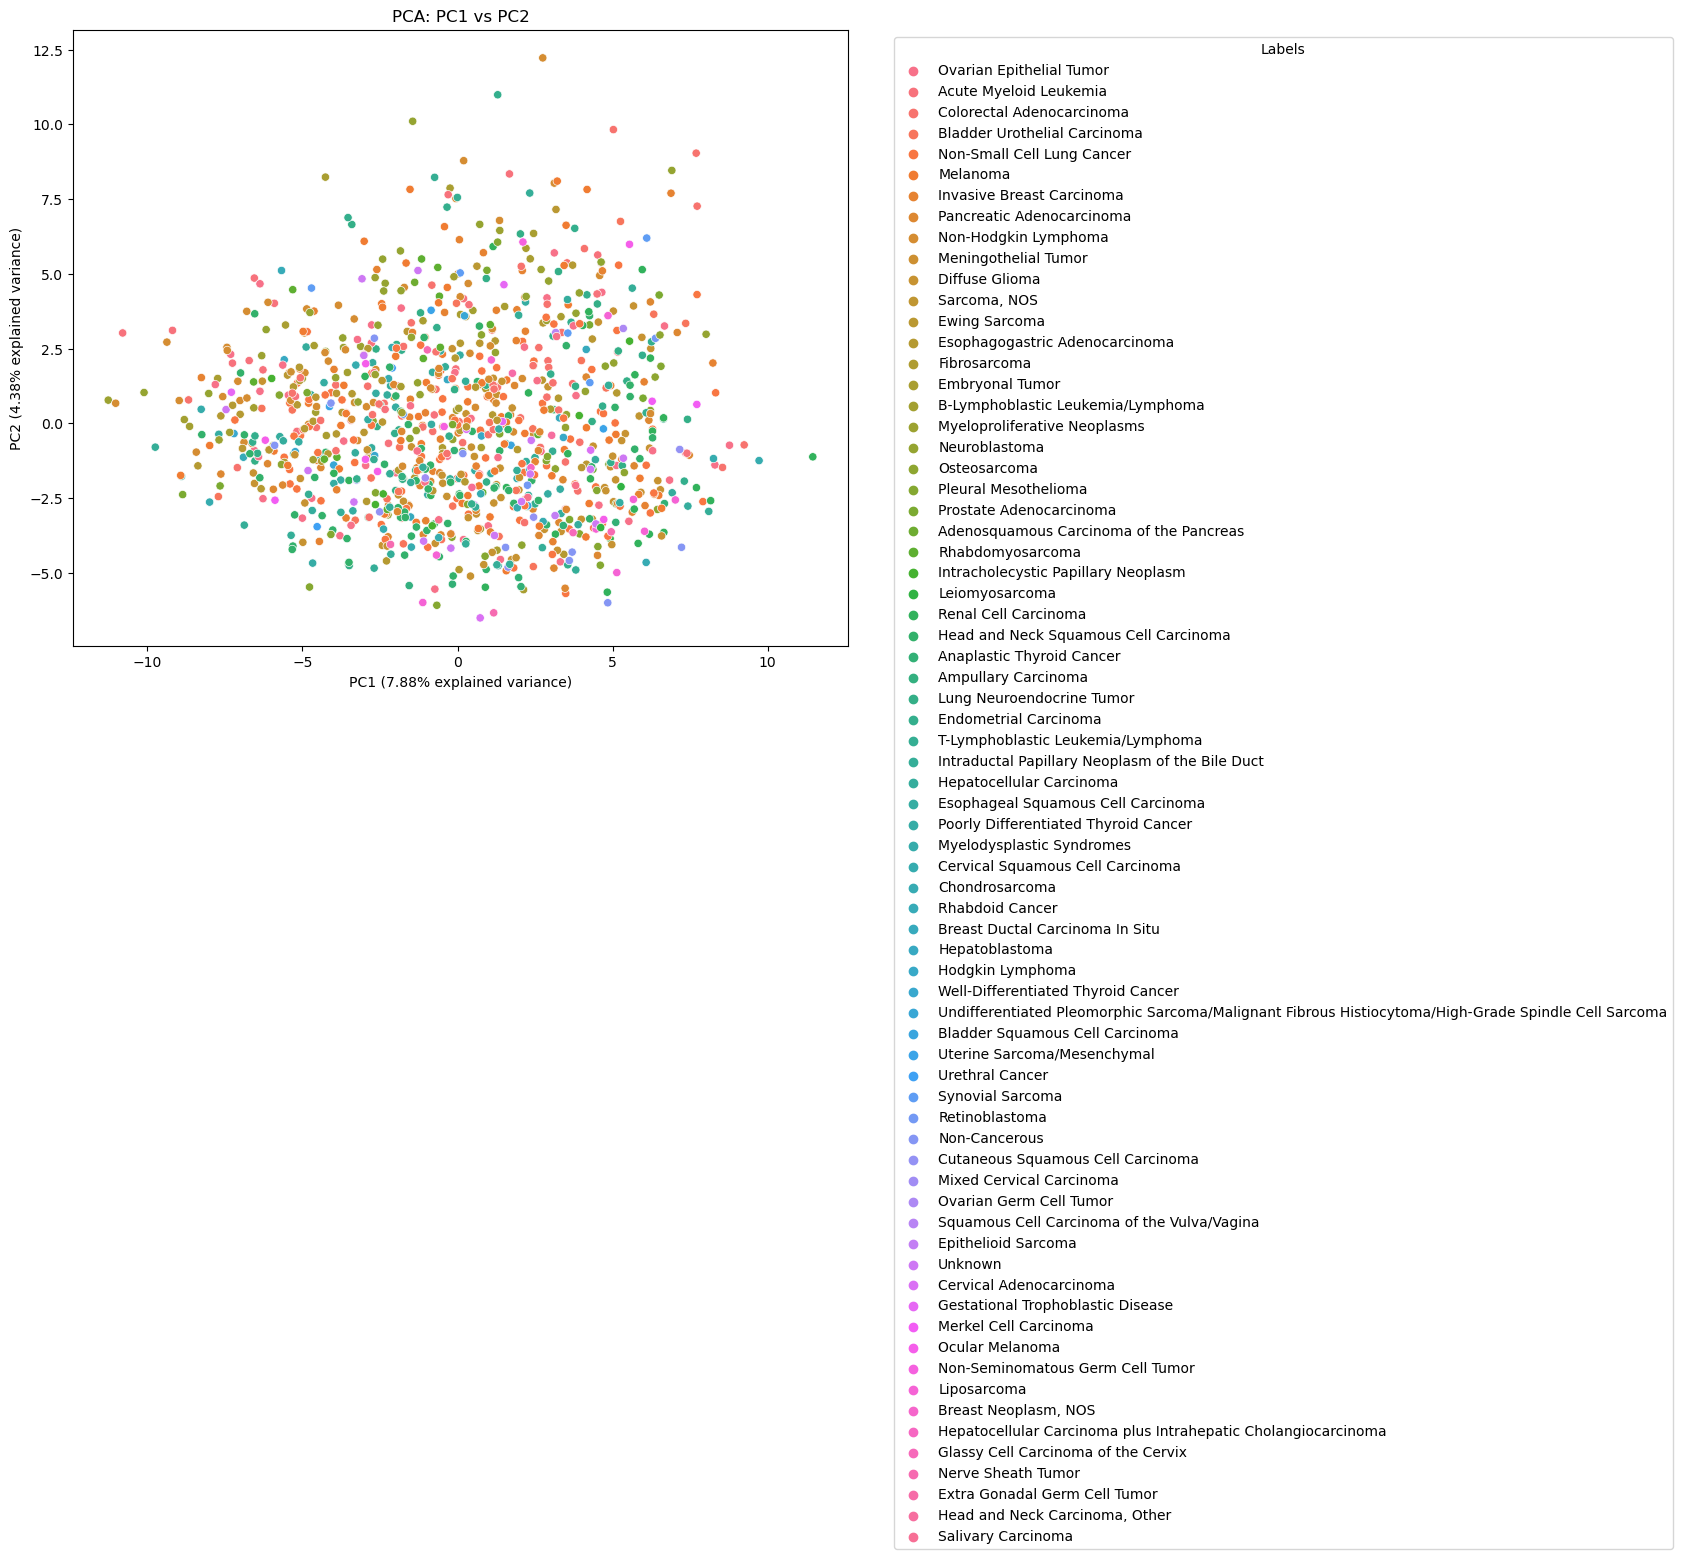

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Define a function to impute missing values with the mean of the row
def impute_row_mean(row):
    row_mean = row.mean()
    #row_mean = 1
    return row.fillna(row_mean)

# Apply the function to impute missing values with row mean
#df_imputed = df.apply(impute_row_mean, axis=1)
df_imputed = df.dropna()
df_imputed = df_imputed.transpose()

# Perform PCA on the imputed DataFrame
pca = PCA(n_components=2)
pca.fit(df_imputed)

# Extract information about the first 10 principal components
explained_variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"PC{i+1}: {ratio:.4f}")

# Generate labels for coloration
df = df.transpose()
Model = pd.read_csv('Achilles//Model.csv', sep=',', index_col=0)
df_updated = df.copy()

for i in df.index:
    if i in Model.index:
        df_updated.index = df_updated.index.map(lambda x: Model.loc[i, "OncotreePrimaryDisease"] if x == i else x) # OncotreeLineage ; OncotreePrimaryDisease
    else:
        df_updated.index = df_updated.index.map(lambda x: "Unknown" if x == i else x)
labels = df_updated.index

# Plot PC1 and PC2 with coloration based on labels
pc1 = pca.transform(df_imputed)[:, 0]
pc2 = pca.transform(df_imputed)[:, 1]

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pc1, y=pc2, hue=labels)
plt.xlabel(f"PC1 ({explained_variance_ratio[0]:.2%} explained variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]:.2%} explained variance)")
plt.title("PCA: PC1 vs PC2")
plt.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Tissue Specific

Explained Variance Ratio:
PC1: 0.0990
PC2: 0.0597
PC3: 0.0454
PC4: 0.0382
PC5: 0.0361
PC6: 0.0318
PC7: 0.0314
PC8: 0.0297
PC9: 0.0277
PC10: 0.0268


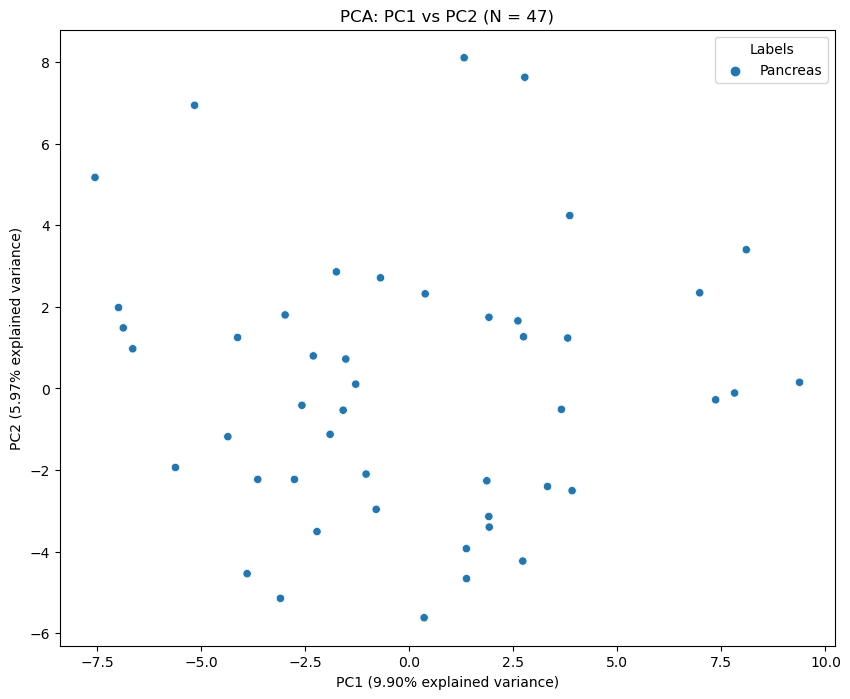

In [135]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Define a function to impute missing values with the mean of the row
def impute_row_mean(row):
    row_mean = row.mean()
    return row.fillna(row_mean)

# Apply the function to impute missing values with row mean
df_imputed = df.apply(impute_row_mean, axis=1)

# Generate labels for coloration
df = df_imputed.transpose()
Model = pd.read_csv('Achilles//Model.csv', sep=',', index_col=0)
df_updated = df.copy()

for i in df.index:
    if i in Model.index:
        df_updated.index = df_updated.index.map(lambda x: Model.loc[i, "OncotreeLineage"] if x == i else x) # OncotreeLineage ; OncotreePrimaryDisease
    else:
        df_updated.index = df_updated.index.map(lambda x: "Unknown" if x == i else x)


# Select only the data with "Melanoma" as the value in "OncotreePrimaryDisease" column
subset_df_imputed = df_updated[df_updated.index == 'Pancreas']
labels = subset_df_imputed.index
# Perform PCA on the subset of data
pca = PCA(n_components=10)
pca.fit(subset_df_imputed)

# Extract information about the first 10 principal components
explained_variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"PC{i+1}: {ratio:.4f}")

# Plot PC1 and PC2 with coloration based on labels
pc1 = pca.transform(subset_df_imputed)[:, 0]
pc2 = pca.transform(subset_df_imputed)[:, 1]

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pc1, y=pc2, hue=labels)
plt.xlabel(f"PC1 ({explained_variance_ratio[0]:.2%} explained variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]:.2%} explained variance)")

# Get the number of data points
num_datapoints = len(subset_df_imputed)

plt.title(f"PCA: PC1 vs PC2 (N = {num_datapoints})")  # Add the number of data points to the plot title
plt.legend(title="Labels")

plt.show()


Tissue Comparison

Explained Variance Ratio:
PC1: 0.0863
PC2: 0.0609
PC3: 0.0407
PC4: 0.0322
PC5: 0.0242
PC6: 0.0212
PC7: 0.0183
PC8: 0.0162
PC9: 0.0159
PC10: 0.0153


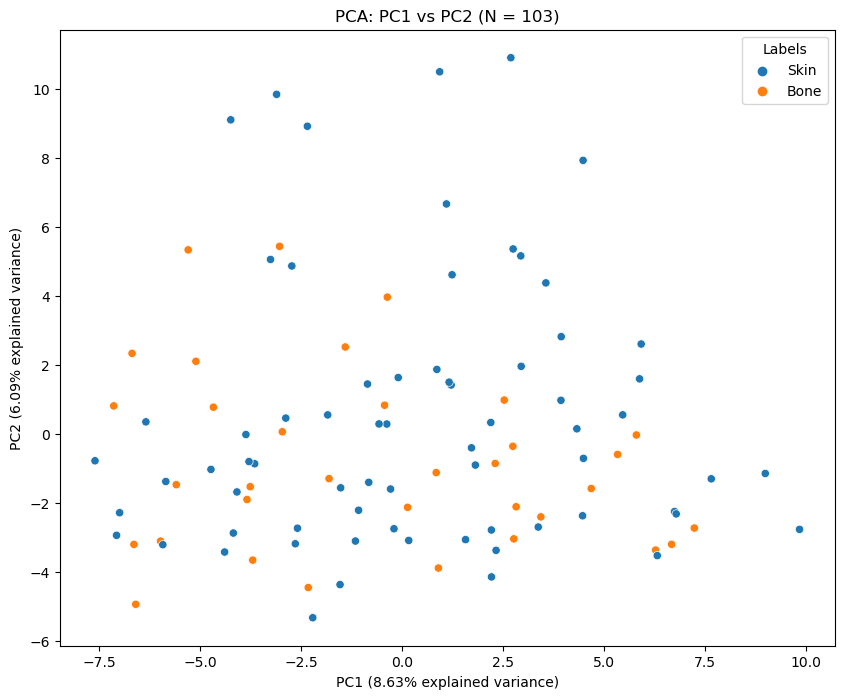

In [134]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Define a function to impute missing values with the mean of the row
def impute_row_mean(row):
    row_mean = row.mean()
    return row.fillna(row_mean)

# Apply the function to impute missing values with row mean
df_imputed = df.apply(impute_row_mean, axis=1)

# Generate labels for coloration
df = df_imputed.transpose()
Model = pd.read_csv('Achilles//Model.csv', sep=',', index_col=0)
df_updated = df.copy()

for i in df.index:
    if i in Model.index:
        df_updated.index = df_updated.index.map(lambda x: Model.loc[i, "OncotreeLineage"] if x == i else x) # OncotreeLineage ; OncotreePrimaryDisease
    else:
        df_updated.index = df_updated.index.map(lambda x: "Unknown" if x == i else x)

# Select only the data with "Melanoma" as the value in "OncotreePrimaryDisease" column
subset_df_imputed = df_updated[df_updated.index.isin(['Skin', 'Bone'])]

labels = subset_df_imputed.index

# Perform PCA on the subset of data
pca = PCA(n_components=10)
pca.fit(subset_df_imputed)

# Extract information about the first 10 principal components
explained_variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"PC{i+1}: {ratio:.4f}")

# Plot PC1 and PC2 with coloration based on labels
pc1 = pca.transform(subset_df_imputed)[:, 0]
pc2 = pca.transform(subset_df_imputed)[:, 1]

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pc1, y=pc2, hue=labels)
plt.xlabel(f"PC1 ({explained_variance_ratio[0]:.2%} explained variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]:.2%} explained variance)")

# Get the number of data points
num_datapoints = len(subset_df_imputed)

plt.title(f"PCA: PC1 vs PC2 (N = {num_datapoints})")  # Add the number of data points to the plot title
plt.legend(title="Labels")

plt.show()


#### Sparse PCA

In [3]:
!pip install numpy scikit-learn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 38.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.9 MB/s eta 0:00:0000:01


                 PC1       PC2
ACH-000001  1.352902  3.139265
ACH-000004  0.291878  1.737838
ACH-000005 -1.659322  5.344467
ACH-000007  2.625121 -0.178414
ACH-000009 -0.913228 -1.136219
...              ...       ...
ACH-002800 -5.476401  0.007455
ACH-002834 -5.320789  1.146976
ACH-002847 -2.209092 -1.647258
ACH-002922  1.127142 -3.458363
ACH-002926  0.851338 -2.621902

[1095 rows x 2 columns]


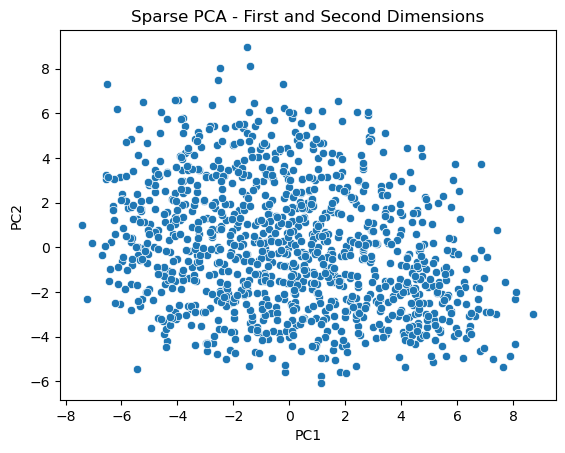

In [36]:
import pandas as pd
from sklearn.decomposition import SparsePCA
import seaborn as sns
import matplotlib.pyplot as plt

your_dataframe = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)
your_dataframe = your_dataframe.dropna()
your_dataframe = your_dataframe.transpose()
# Perform Sparse PCA
n_components = 2
sparse_pca = SparsePCA(n_components=n_components)
transformed_data = sparse_pca.fit_transform(your_dataframe)

# Create a new DataFrame with row names as index
transformed_df = pd.DataFrame(transformed_data, index=your_dataframe.index)
column_names = [f'PC{i+1}' for i in range(n_components)]  # Generate column names
transformed_df.columns = column_names  # Assign column names

# Print the transformed DataFrame
print(transformed_df)

# Create the scatterplot
sns.scatterplot(data=transformed_df, x='PC1', y='PC2')

# Set plot title and labels
plt.title('Sparse PCA - First and Second Dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘igraph’

The following object is masked from ‘package:plotly’:

    groups

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message:
In geom_point(data = df1, aes(x = fp_cum, y = tp_cum, key = score),  :
  Ignoring unknown aesthetics: key


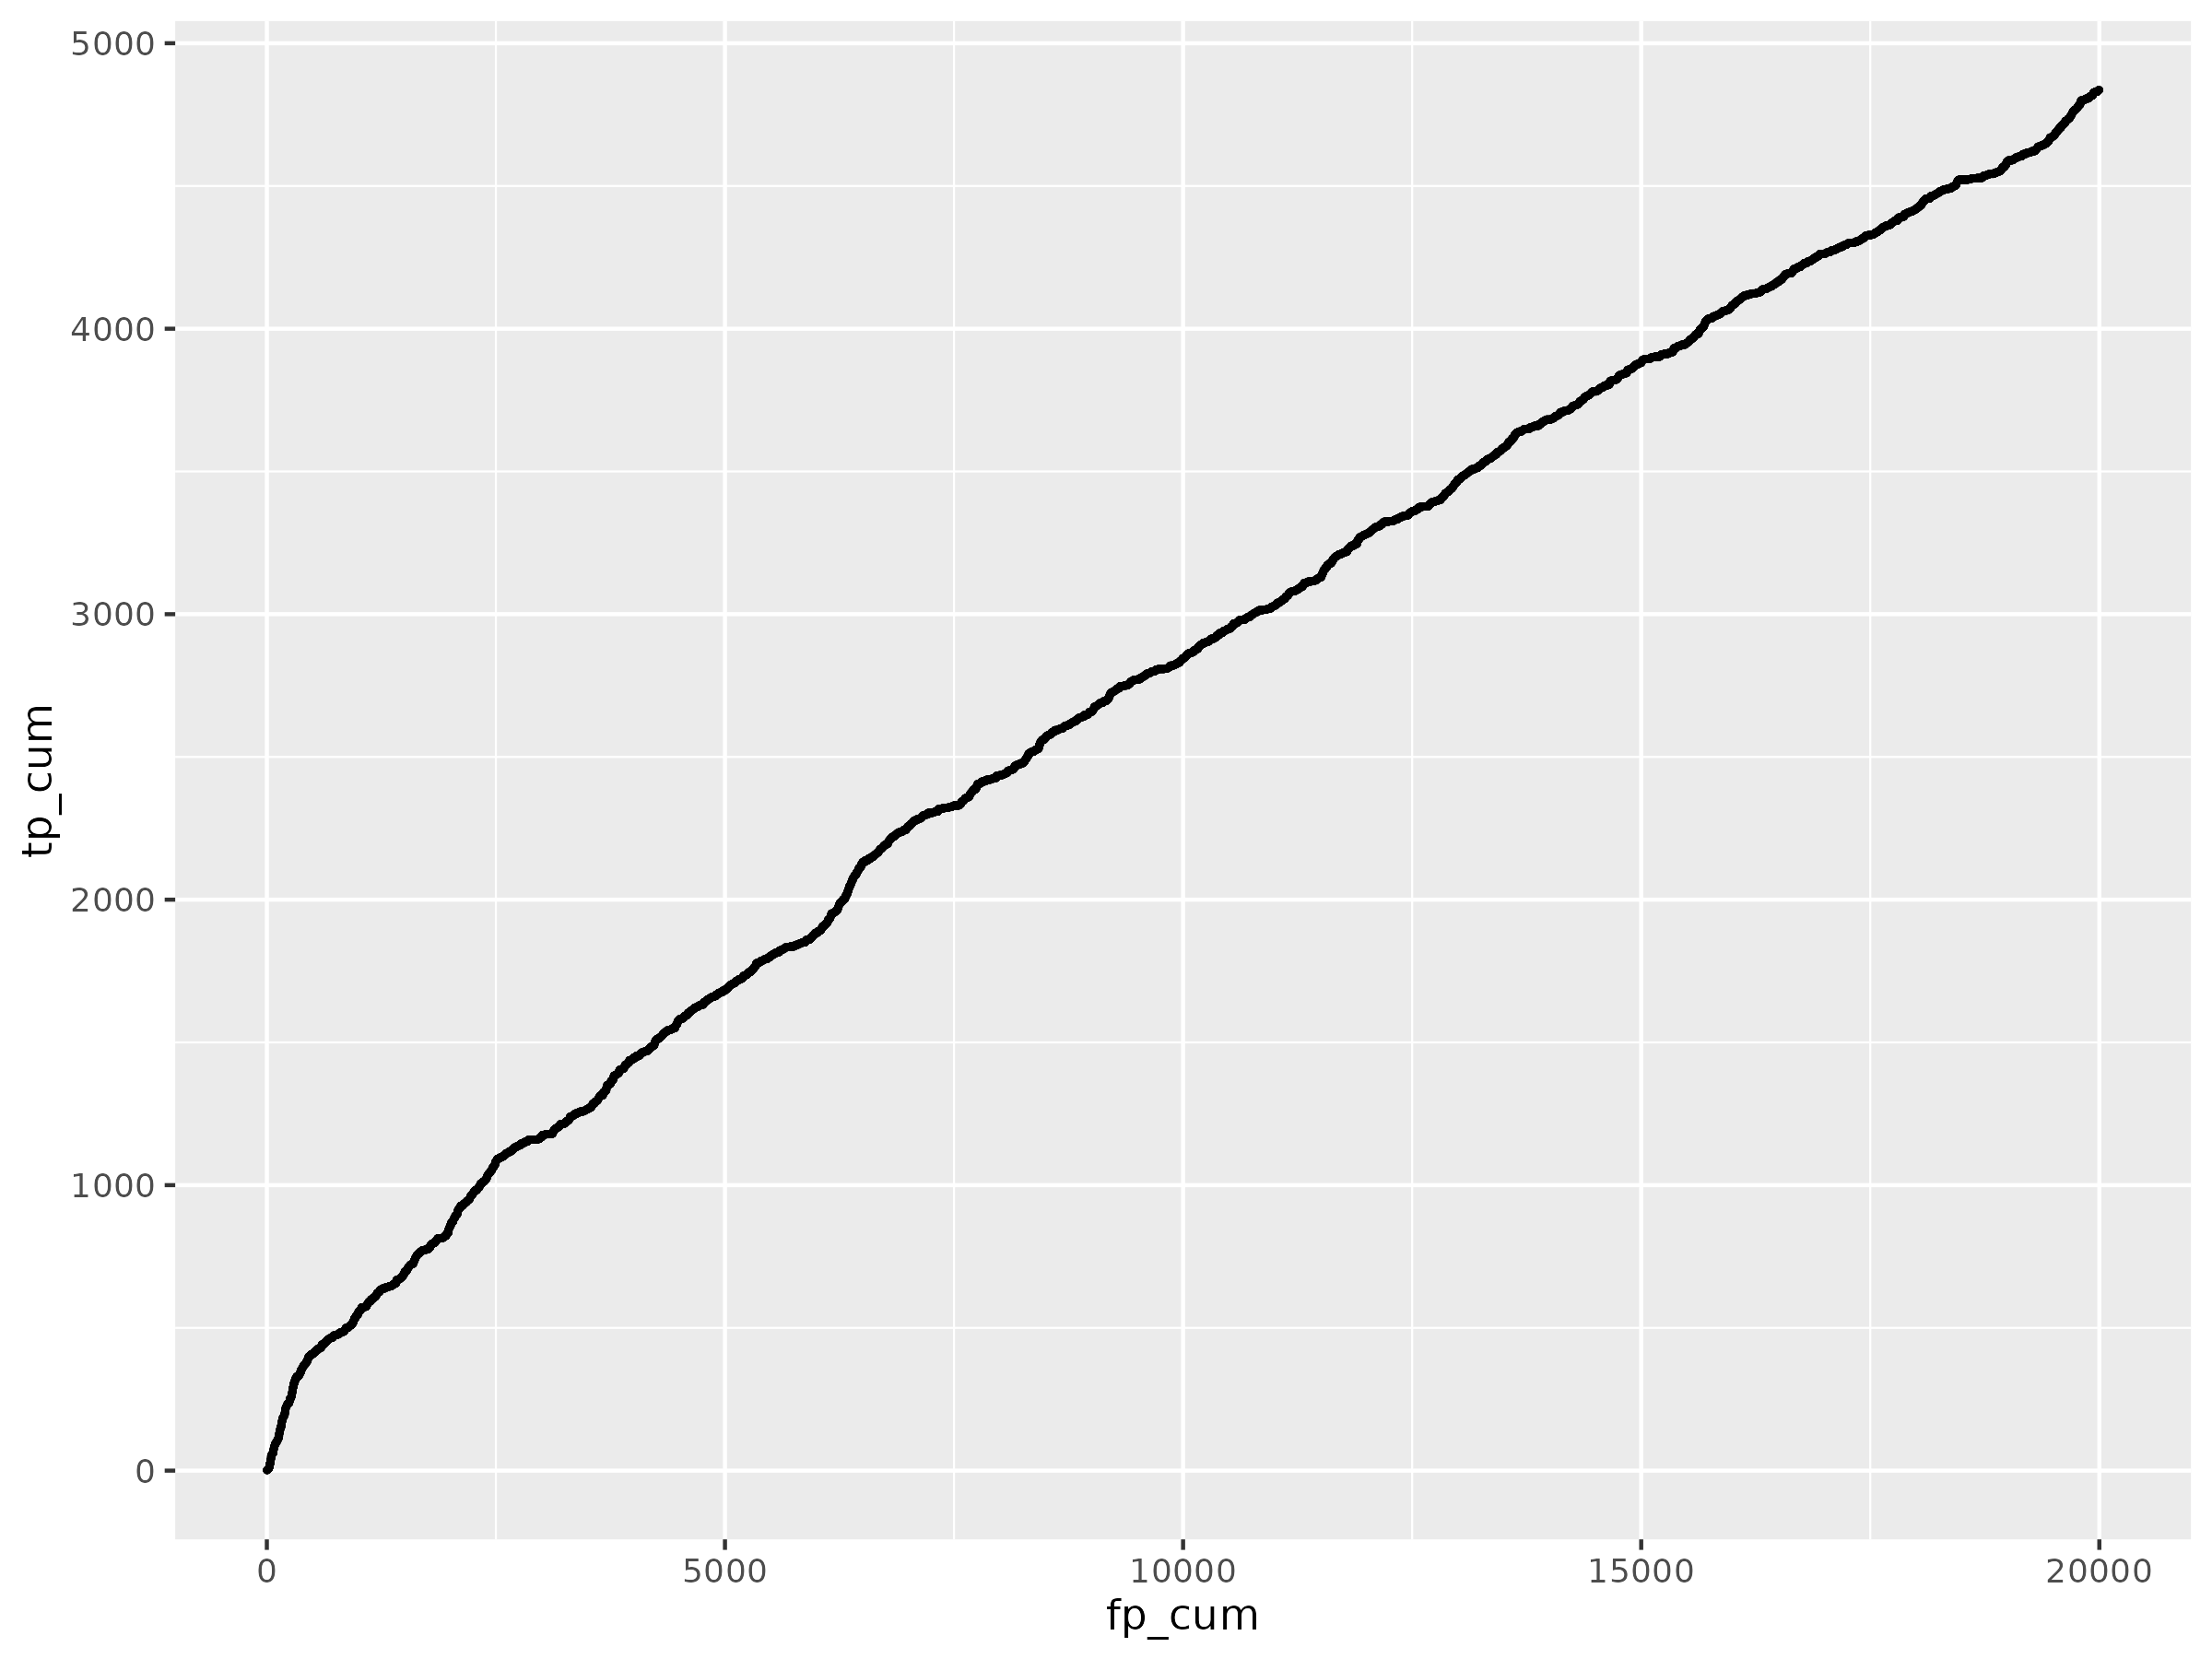

In [34]:
df = transformed_df.transpose()

# Compute the correlation matrix using Pearson correlation coefficient
corr_matrix = df.corr(method='pearson')

# Set a threshold for the correlation coefficient
threshold = 0.5

# Filter the correlation matrix to only include pairs with correlation coefficient above the threshold
high_corr_pairs = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()

# Rename the columns of the filtered pairs dataframe
high_corr_pairs.columns = ['Protein_1', 'Protein_2', 'Score']
Network = high_corr_pairs

Network = Network[Network['Protein_1'] != Network['Protein_2']]
Network = Network.nlargest(200000, 'Score')
Network.to_csv('Networks//Achilles_Pearson.txt',sep='\t')

final_network = Annot_network('Networks//Achilles_Pearson.txt',"STRING proteins//9606.protein.aliases.v11.5.txt")
final_network.to_csv('Networks//Homo_Sapiens.tsv',sep='\t',header = False)
CommandLinePearson()

!Rscript benchmark_plot_coX.R 'Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv' 'Roc_png//Achilles_benchmark_kegg2.png' 
from IPython.display import Image
Image("Roc_png//Achilles_benchmark_kegg2.png")

#### U-Map

In [5]:
%%capture

!pip uninstall umap
!pip install umap-learn
!pip install umap-learn --upgrade

In [3]:
!pip install umap-learn --upgrade

Sample UMAP

In [6]:
import pandas as pd
import umap.umap_ as umap

# Assuming you have a pandas DataFrame called "df"
# with the data you want to perform UMAP on
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Extract the numerical values from the DataFrame
#data = df_imputed.values
data = df.dropna()

# Generate labels for coloration
df = data.transpose()
Model = pd.read_csv('Achilles//Model.csv', sep=',', index_col=0)
df_updated = df.copy()

for i in df.index:
    if i in Model.index:
        df_updated.index = df_updated.index.map(lambda x: Model.loc[i, "OncotreeLineage"] if x == i else x) # OncotreeLineage ; OncotreePrimaryDisease
    else:
        df_updated.index = df_updated.index.map(lambda x: "Unknown" if x == i else x)


# Select only the data with "Melanoma" as the value in "OncotreePrimaryDisease" column
data = df_updated[df_updated.index == 'Pancreas']
data = data.transpose()

# Perform UMAP
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.05, metric='euclidean', n_components=2)

embedding = umap_obj.fit_transform(data)

ContextualVersionConflict: (numpy 1.25.2 (/opt/conda/lib/python3.10/site-packages), Requirement.parse('numpy<1.25,>=1.21'), {'numba'})

Protein UMAP

In [7]:
import pandas as pd
import umap.umap_ as umap

# Assuming you have a pandas DataFrame called "df"
# with the data you want to perform UMAP on
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Extract the numerical values from the DataFrame
#data = df_imputed.values
data = df.dropna()
#data = data.transpose()

# Perform UMAP
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.05, metric='euclidean', n_components=2)

embedding = umap_obj.fit_transform(data)


ContextualVersionConflict: (numpy 1.25.2 (/opt/conda/lib/python3.10/site-packages), Requirement.parse('numpy<1.25,>=1.21'), {'numba'})

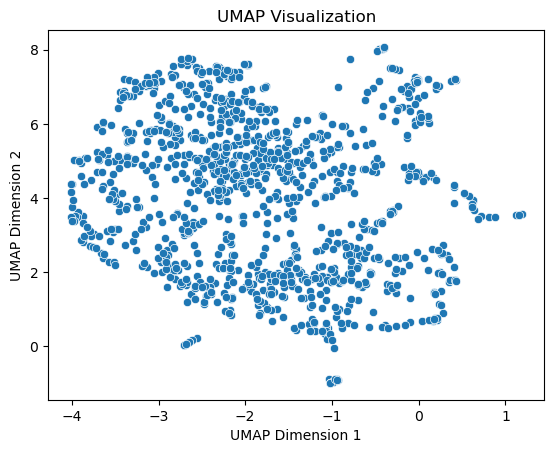

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the embedding
embedding_df = pd.DataFrame(embedding, columns=[f"UMAP Dimension {i+1}" for i in range(embedding.shape[1])])


# Visualize the embedding with labels using seaborn
sns.scatterplot(data=embedding_df, x="UMAP Dimension 1", y="UMAP Dimension 2")
plt.title('UMAP Visualization')
plt.show()

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the embedding
embedding_df = pd.DataFrame(embedding, columns=[f"UMAP Dimension {i+1}" for i in range(embedding.shape[1])])

df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Generate labels for coloration
df = df.transpose()
Model = pd.read_csv('Achilles//Model.csv', sep=',', index_col=0)
df_updated = df.copy()

for i in df.index:
    if i in Model.index:
        df_updated.index = df_updated.index.map(lambda x: Model.loc[i, "OncotreeLineage"] if x == i else x) # OncotreeLineage ; OncotreePrimaryDisease
    else:
        df_updated.index = df_updated.index.map(lambda x: "Unknown" if x == i else x)
labels = df_updated.index

# Add the labels from the original DataFrame to the embedding DataFrame
embedding_df['label'] = labels

# Visualize the embedding with labels using seaborn
sns.scatterplot(data=embedding_df, x="UMAP Dimension 1", y="UMAP Dimension 2", hue='label', palette='viridis')
plt.title('UMAP Visualization')
#plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

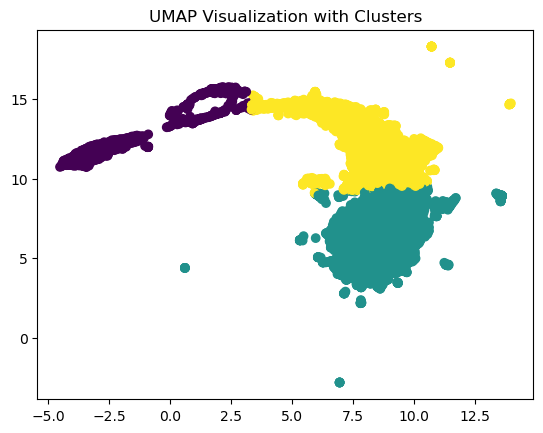

NameError: name 'labels' is not defined

In [14]:
import pandas as pd
from sklearn.cluster import KMeans

# Apply K-means clustering on the embedding
kmeans = KMeans(n_clusters=3)  # Specify the desired number of clusters
cluster_labels = kmeans.fit_predict(embedding)

# Visualize the clusters in the embedding
plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='viridis')
plt.title('UMAP Visualization with Clusters')
plt.show()

# Create a DataFrame with the embedding and labels
embedding_df = pd.DataFrame(embedding, columns=[f"UMAP Dimension {i+1}" for i in range(embedding.shape[1])])
embedding_df["label"] = labels

# Create a DataFrame with the cluster assignments
cluster_df = pd.DataFrame({"Cluster": cluster_labels, "Label": labels})

# Calculate the total count of each label in the entire dataset
total_count = cluster_df["Label"].value_counts().reset_index()
total_count.columns = ["Label", "Total Count"]


# Create a DataFrame with the cluster assignments
cluster_df = pd.DataFrame({"Cluster": cluster_labels, "Label": labels})

# Group the data by cluster and label, and calculate the count of points per label in each cluster
grouped_df = cluster_df.groupby(["Cluster", "Label"]).size().reset_index(name="Count")
grouped_df = pd.merge(grouped_df, total_count, on="Label", suffixes=("", "_Total Count"))

# Print the resulting matrix
print(grouped_df)

# Calculate the count of labels within each cluster
cluster_label_counts = cluster_df.groupby(["Cluster", "Label"]).size().reset_index(name="Count")

# Merge with total count DataFrame to include the total count of each label
cluster_label_counts = pd.merge(cluster_label_counts, total_count, on="Label")

# Sort the DataFrame by cluster and count
cluster_label_counts = cluster_label_counts.sort_values(["Cluster", "Count"], ascending=[True, False])

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_label_counts, x="Cluster", y="Count", hue="Label", palette="viridis")
plt.title("Label Distribution within Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
# Specify the cluster number you want to filter
desired_cluster = 9

# Filter the grouped DataFrame for the desired cluster
cluster_matrix = grouped_df[grouped_df['Cluster'] == desired_cluster]

# Print the cluster matrix
print(cluster_matrix)


     Cluster     Label  Count  Total Count
192        9  Lymphoid     35           78
330        9   Myeloid     11           37


#### Kernel PCA

In [73]:
import pandas as pd
from sklearn.decomposition import KernelPCA

# Assuming you have a dataframe named 'df'
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Extract the numerical values from the DataFrame
data = df.dropna().transpose().values

# Step 1: Preprocess the data if necessary (e.g., handle missing values, scale the features)

# Step 2: Extract the features from the dataframe
X = data

# Step 3: Create an instance of the KernelPCA class and specify the kernel and other parameters
n_components = 10  # Number of principal components
kpca = KernelPCA(kernel='rbf', n_components=n_components)  # Example with RBF kernel and 10 components

# Step 4: Perform Kernel PCA on the data
X_kpca = kpca.fit_transform(X)

# Generate column labels for the principal components
component_labels = [f'PC{i+1}' for i in range(n_components)]

# Create a new dataframe using the transformed data and column labels
df_kpca = pd.DataFrame(data=X_kpca, columns=component_labels)



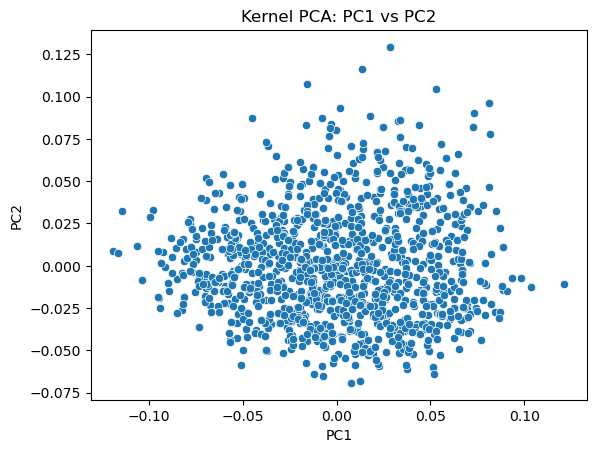

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe 'df_kpca' containing the Kernel PCA results

# Plot PC1 and PC2 using seaborn
sns.scatterplot(x='PC1', y='PC2', data=df_kpca)
plt.title('Kernel PCA: PC1 vs PC2')
plt.show()


#### Sub-Cluster Investigation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Define a function to impute missing values with the mean of the row
def impute_row_mean(row):
    row_mean = row.mean()
    return row.fillna(row_mean)

# Apply the function to impute missing values with row mean
df_imputed = df.apply(impute_row_mean, axis=1)


# Perform PCA on the imputed DataFrame
pca = PCA(n_components=20)
pca.fit(df_imputed)

# Extract information about the first 10 principal components
explained_variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"PC{i+1}: {ratio:.4f}")

# Plot PC1 and PC2 with coloration based on labels
pc1 = pca.transform(df_imputed)[:, 0]
pc2 = pca.transform(df_imputed)[:, 1]

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pc1, y=pc2)
plt.xlabel(f"PC1 ({explained_variance_ratio[0]:.2%} explained variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]:.2%} explained variance)")
plt.title("PCA: PC1 vs PC2")
plt.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [12]:
!pip install numpy scikit-learn
!pip install seaborn

In [7]:
!pip uninstall umap
!pip install umap-learn

In [5]:
!pip install umap-learn --upgrade

In [9]:
import pandas as pd
import umap.umap_ as umap

# Assuming you have a pandas DataFrame called "df"
# with the data you want to perform UMAP on
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Extract the numerical values from the DataFrame
#data = df_imputed.values
data = df.dropna()
#data = data.transpose()

# Perform UMAP
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.05, metric='euclidean', n_components=2)

embedding = umap_obj.fit_transform(data)


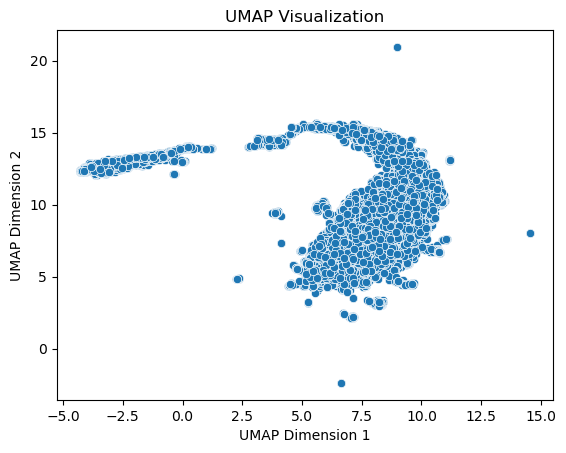

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the embedding
embedding_df = pd.DataFrame(embedding, columns=[f"UMAP Dimension {i+1}" for i in range(embedding.shape[1])])

# Visualize the embedding with labels using seaborn
sns.scatterplot(data=embedding_df, x="UMAP Dimension 1", y="UMAP Dimension 2")
plt.title('UMAP Visualization')
#plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.show()

In [60]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming embedding_df is a pandas DataFrame with columns 'dim1' and 'dim2'
# Convert the dataframe to a numpy array
embedding_array = embedding_df[['UMAP Dimension 1', 'UMAP Dimension 2']].values

# Find the optimal number of clusters using the elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(embedding_array)
    distortions.append(kmeans.inertia_)

# Determine the optimal number of clusters (K) using the elbow method
elbow_index = np.argmin(np.diff(distortions)) + 1
optimal_clusters = K[elbow_index]

# Perform K-means clustering with K++ initialization
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++')
kmeans.fit(embedding_array)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataframe
embedding_df['cluster'] = labels


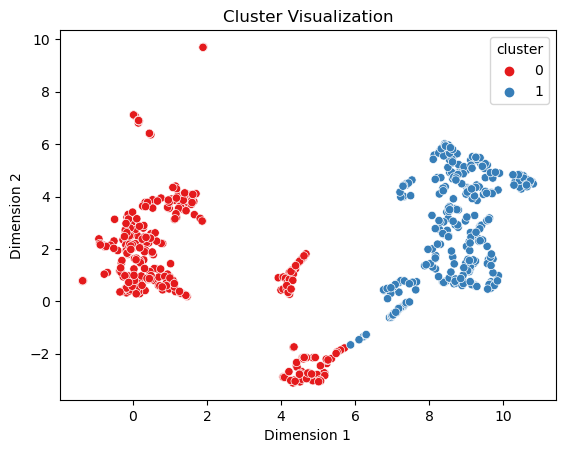

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming embedding_df has the 'cluster' column with cluster labels

# Set up the scatter plot
sns.scatterplot(data=embedding_df, x='UMAP Dimension 1', y='UMAP Dimension 2', hue='cluster', palette='Set1')

# Add labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Cluster Visualization')

# Show the plot
plt.show()


/tmp/ipykernel_224/2191276726.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster['UMAP Dimension 1'], cluster['UMAP Dimension 2'], c=colors[0], cmap='viridis')


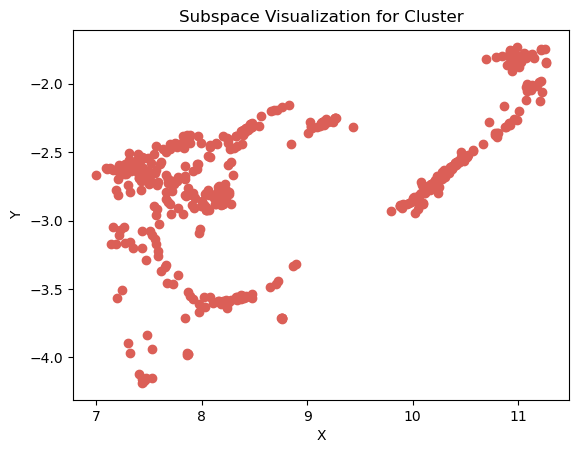

In [28]:
# Filter the dataframe for cluster_0_df
df = pd.DataFrame(embedding, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])  # Assuming the embedding has 2 dimensions (x, y)
df['Cluster'] = labels

cluster = df[df['Cluster'] == 6].copy()
num_clusters = 10
palette = sns.color_palette("hls", num_clusters)
colors = np.array(palette.as_hex())
# Visualize the subspace in the embedding for cluster_0_df
plt.scatter(cluster['UMAP Dimension 1'], cluster['UMAP Dimension 2'], c=colors[0], cmap='viridis')
plt.title('Subspace Visualization for Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [56]:
df = data
df = df.dropna()

df['Cluster'] = labels

# Create a dictionary to store cluster dataframes
cluster_dfs = {}

# Iterate over unique cluster labels
for cluster_label in df['Cluster'].unique():
    # Filter dataframe for the current cluster
    cluster_df = df[df['Cluster'] == cluster_label].copy()
    # Drop the 'Cluster' column if desired
    cluster_df.drop('Cluster', axis=1, inplace=True)
    # Add the cluster dataframe to the dictionary
    cluster_dfs[cluster_label] = cluster_df

# Accessing individual cluster dataframes
cluster_0_df = cluster_dfs[0]
cluster_1_df = cluster_dfs[1]
cluster_2_df = cluster_dfs[2]
cluster_3_df = cluster_dfs[3]
cluster_4_df = cluster_dfs[4]
cluster_5_df = cluster_dfs[5]
cluster_6_df = cluster_dfs[6]
cluster_7_df = cluster_dfs[7]
cluster_8_df = cluster_dfs[8]
cluster_9_df = cluster_dfs[9]
cluster_10_df = cluster_dfs[10]
cluster_11_df = cluster_dfs[11]
cluster_12_df = cluster_dfs[12]



KeyError: 3

Sub Cluster UMap

In [38]:
import pandas as pd
import umap.umap_ as umap

# Assuming you have a pandas DataFrame called "df"
# with the data you want to perform UMAP on
df = cluster_6_df

# Extract the numerical values from the DataFrame
#data = df_imputed.values
data = df.dropna()
#data = data.transpose()

# Perform UMAP
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.05, metric='euclidean', n_components=2)

embedding = umap_obj.fit_transform(data)


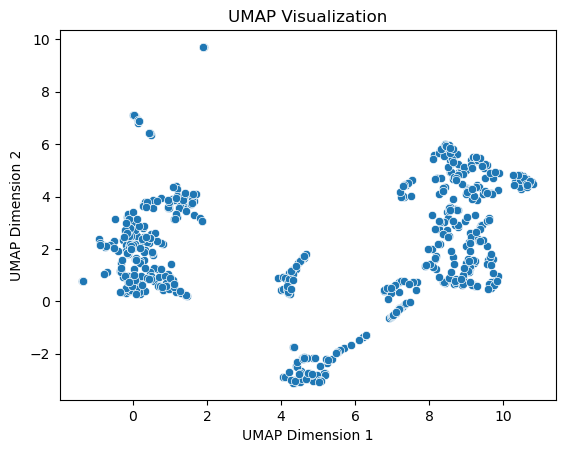

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the embedding
embedding_df = pd.DataFrame(embedding, columns=[f"UMAP Dimension {i+1}" for i in range(embedding.shape[1])])

# Visualize the embedding with labels using seaborn
sns.scatterplot(data=Sub_embedding_df, x="UMAP Dimension 1", y="UMAP Dimension 2")
plt.title('UMAP Visualization')
#plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
plt.show()

Sub Cluster Pearson

In [65]:
df = cluster_6_df.transpose()

# Assuming you have a DataFrame named 'df' with column names
column_names = df.columns.tolist()  # Get the column names as a list

# Create a new DataFrame with the column names
df_column_names = pd.DataFrame(column_names, columns=['Column Names'])

# Save the column names as a CSV file
df_column_names.to_csv('Pancreas_Protein_Subset.csv', index=False)

In [147]:
df = pd.read_csv('Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv', sep='\t')

# Assuming 'df' is your existing DataFrame
df = df[df['tp'] == 1].head(5000)
df = df.iloc[:, :2]

df.to_csv('Protein_Correlation.csv', index=False)
df

,protein1,protein2
0,9606.ENSP00000341082,9606.ENSP00000338057
1,9606.ENSP00000338057,9606.ENSP00000341082
2,9606.ENSP00000418842,9606.ENSP00000299166
3,9606.ENSP00000299166,9606.ENSP00000418842
4,9606.ENSP00000317376,9606.ENSP00000382250
...,...,...
19901,9606.ENSP00000441126,9606.ENSP00000300688
19912,9606.ENSP00000016171,9606.ENSP00000252711
19913,9606.ENSP00000252711,9606.ENSP00000016171
19916,9606.ENSP00000229379,9606.ENSP00000266544


In [63]:
import pandas as pd
import numpy as np

df = pd.read_csv('Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv', sep='\t')
unique_protein1 = df[df['tp'] == 1]['protein1'].head(4000).unique()
unique_protein2 = df[df['tp'] == 1]['protein2'].head(4000).unique()

combined_unique_proteins = np.concatenate((unique_protein1, unique_protein2))
combined_unique_proteins = np.unique(combined_unique_proteins)

print(len(combined_unique_proteins))

combined_unique_proteins_df = pd.DataFrame(combined_unique_proteins, columns=['Protein'])
combined_unique_proteins_df.to_csv('Protein_Subset_Positive.csv', index=False)


160


In [40]:
#cluster_6_df.to_csv('Protein_Subcluster.csv', index=False)
cluster_6_df




,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,...,ACH-002687,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002926
AARS2,0.870920,0.367794,0.064621,0.694474,0.481967,0.052284,0.937097,0.941269,0.443114,0.843151,...,0.645335,0.861082,0.184386,0.068979,0.839191,0.037494,0.040794,0.435150,0.677735,0.787405
AASDHPPT,0.360696,0.255623,0.044400,0.668620,0.250299,0.250145,0.718589,0.739363,0.617042,0.286645,...,0.038252,0.399035,0.697063,0.109538,0.670692,0.170246,0.584680,0.025634,0.729835,0.230438
ACAD9,0.164318,0.239413,0.418825,0.576699,0.265013,0.022129,0.693914,0.138174,0.142174,0.661687,...,0.316215,0.079775,0.063479,0.159285,0.116857,0.030108,0.092988,0.212904,0.130650,0.150740
ACLY,0.937870,0.264275,0.212912,0.952843,0.975909,0.234672,0.924283,0.940630,0.985311,0.676281,...,0.920247,0.750070,0.541216,0.234487,0.657593,0.173958,0.318181,0.637190,0.743281,0.972819
ACO2,0.999870,0.952199,0.906907,0.984318,0.983831,0.331988,0.929104,0.887444,0.780468,0.944866,...,0.991743,0.672944,0.241826,0.918618,0.210305,0.309686,0.367073,0.947762,0.741904,0.895132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YME1L1,0.205341,0.106060,0.216478,0.224477,0.275499,0.021455,0.090712,0.009909,0.143646,0.135518,...,0.256769,0.047295,0.102745,0.015997,0.145074,0.011355,0.137832,0.171312,0.021678,0.142833
YTHDC1,0.260992,0.807106,0.507445,0.791115,0.657644,0.483128,0.614658,0.528392,0.142265,0.206914,...,0.534020,0.586887,0.312679,0.630925,0.559659,0.696556,0.542214,0.575690,0.428831,0.597370
YWHAE,0.280070,0.311206,0.055563,0.972923,0.770119,0.630843,0.812223,0.690502,0.985521,0.457335,...,0.832714,0.382064,0.668453,0.449457,0.221819,0.653762,0.151402,0.890010,0.108976,0.904621
ZNHIT1,0.387852,0.343661,0.090084,0.344702,0.531144,0.292135,0.842068,0.731213,0.059291,0.511120,...,0.554427,0.551812,0.520863,0.119546,0.343687,0.453017,0.395234,0.714495,0.377377,0.612325


Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘igraph’

The following object is masked from ‘package:plotly’:

    groups

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message:
In geom_point(data = df1, aes(x = fp_cum, y = tp_cum, key = score),  :
  Ignoring unknown aesthetics: key


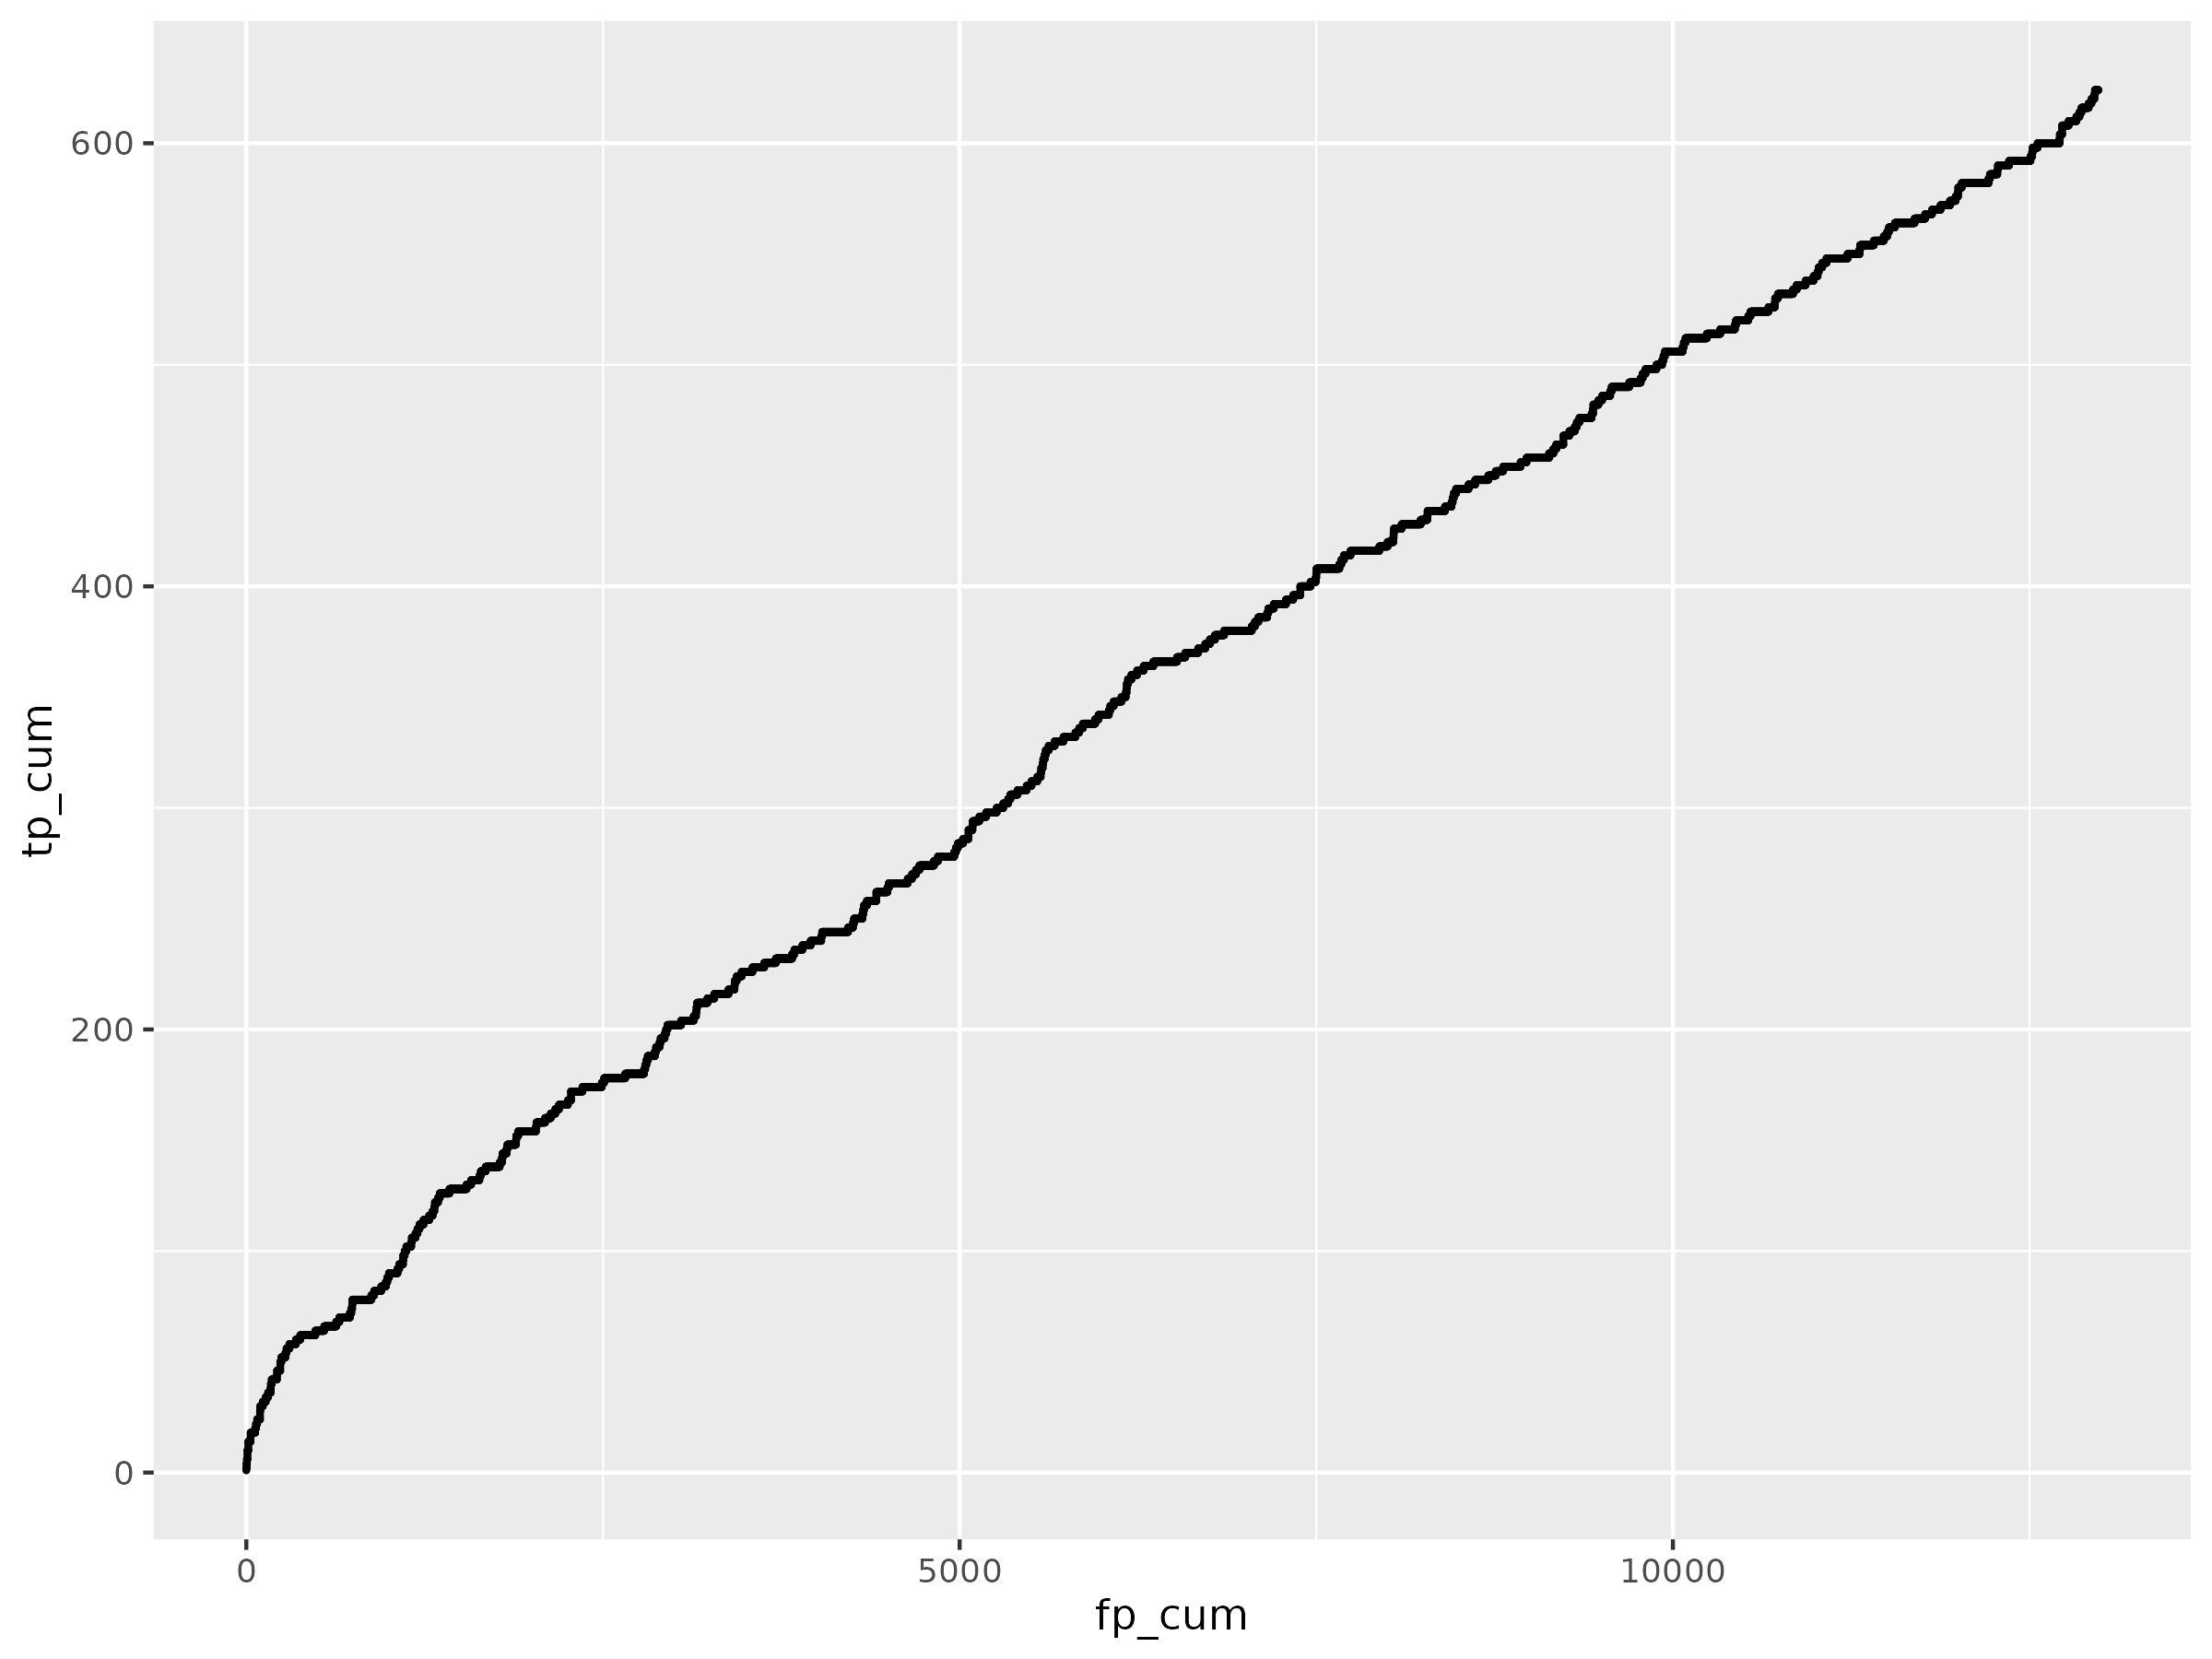

In [61]:
df = subset_df.transpose()
#df = data.transpose()
# Compute the correlation matrix using Pearson correlation coefficient
corr_matrix = df.corr(method='pearson')

# Set a threshold for the correlation coefficient
threshold = 0

# Filter the correlation matrix to only include pairs with correlation coefficient above the threshold
high_corr_pairs = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()

# Rename the columns of the filtered pairs dataframe
high_corr_pairs.columns = ['Protein_1', 'Protein_2', 'Score']
Network = high_corr_pairs

Network = Network[Network['Protein_1'] != Network['Protein_2']]
Network = Network.nlargest(200000, 'Score')
#Network.to_csv('Networks//Achilles_CRISPRGeneDependency_Pearson.txt',sep='\t') # Nothing required

Network.to_csv('Networks//Achilles_Pearson.txt',sep='\t')

final_network = Annot_network('Networks//Achilles_Pearson.txt',"STRING proteins//9606.protein.aliases.v11.5.txt")
final_network.to_csv('Networks//Homo_Sapiens.tsv',sep='\t',header = False)
CommandLinePearson()

!Rscript benchmark_plot_coX.R 'Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv' 'Roc_png//Achilles_benchmark_kegg2.png' 
from IPython.display import Image
Image("Roc_png//Achilles_benchmark_kegg2.png")

#### Information Analysis 

In [26]:
!pip uninstall umap

In [12]:
%%capture --no-display
!pip uninstall umap
!pip install umap-learn
!pip install numpy scikit-learn
!pip install seaborn

In [13]:
%%capture --no-display
!pip install umap-learn --upgrade

In [45]:
import pandas as pd
import umap.umap_ as umap
from sklearn.feature_selection import mutual_info_regression

# Assuming you have a pandas DataFrame called "df"
# with the data you want to perform UMAP on
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Extract the numerical values from the DataFrame
data = df.dropna()

# Perform UMAP
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.05, metric='euclidean', n_components=2)
embedding = umap_obj.fit_transform(data)


ValueError: cannot assign slice from input of different size

In [12]:
#data.index
embedding_df.index = data.index
embedding_df

,UMAP Dimension 1,UMAP Dimension 2
A1BG,10.413920,10.313794
A1CF,8.575010,9.549878
A2M,7.426788,7.176185
A2ML1,5.848221,7.572157
A3GALT2,9.107024,12.487268
...,...,...
ZYG11A,8.715611,9.173098
ZYG11B,9.192065,13.037878
ZYX,8.288135,9.673140
ZZEF1,9.164844,11.167208


In [13]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
#df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

# Extract the numerical values from the DataFrame
#data = df.dropna()
data = embedding_df
new_column_names = list(range(1, len(data.columns) + 1))
data.columns = new_column_names

data = data.transpose()
# Assuming you have a DataFrame called 'data' with reduced space and variables
reduced_data = data  # Exclude the index column and keep only the data columns

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Fit the model and calculate feature importances
rf.fit(reduced_data, data.index)
feature_importances = pd.DataFrame({'Variable': reduced_data.columns, 'Importance': rf.feature_importances_})

# Sort the variables based on importance scores
sorted_variables = feature_importances.sort_values('Importance', ascending=False)

ranked_variables = sorted_variables['Variable'].tolist()



In [14]:
ranked_variables

['FREM3',
 'LRATD2',
 'ARMCX1',
 'KCTD2',
 'DAG1',
 'FMO1',
 'ARPC5L',
 'DEFB132',
 'HMX2',
 'ZNF816',
 'TMBIM4',
 'SPATA24',
 'ZNF841',
 'ARSI',
 'USP32',
 'VPS28',
 'DUS3L',
 'AMZ1',
 'BRINP3',
 'CBR3',
 'DDX53',
 'ACADVL',
 'NPHP3',
 'SOX17',
 'CITED2',
 'SIPA1',
 'PRXL2A',
 'UBQLN2',
 'GRIP1',
 'ADM2',
 'B4GALT4',
 'CMKLR1',
 'MAN2A2',
 'NAB1',
 'KPNA5',
 'LDHA',
 'TRAF3IP3',
 'KRT3',
 'GALNT5',
 'PTPN9',
 'C1orf174',
 'PER1',
 'ZNF703',
 'IL21R',
 'STRN4',
 'SPRY2',
 'SELENOM',
 'GNL2',
 'RNF2',
 'ALG6',
 'P2RY11',
 'IMPDH2',
 'CCDC113',
 'PRR5',
 'PRAME',
 'PRR5L',
 'PRRC2C',
 'PRR7',
 'PRR9',
 'PRR4',
 'PRR35',
 'PRRC1',
 'PRAM1',
 'PRRC2A',
 'PRRC2B',
 'PRDX5',
 'PRRG1',
 'PRRG2',
 'PRRG3',
 'PRR30',
 'PRRG4',
 'PRAG1',
 'PRRT1',
 'PRRT2',
 'PRRT3',
 'PRAF2',
 'PRRT4',
 'PRRX1',
 'PRRX2',
 'PRR32',
 'PRR29',
 'PRR3',
 'PRSS12',
 'PRPF6',
 'PRPF8',
 'PRPH',
 'PRPH2',
 'PRPS1',
 'PRPS1L1',
 'PRPS2',
 'PRPSAP1',
 'PRPSAP2',
 'PRR11',
 'PRR12',
 'PRR13',
 'PRR14',
 'PRR14L',
 'PRC1

In [15]:
import pandas as pd

# Assuming you already have the DataFrame 'test'
test = pd.DataFrame(set(ranked_variables[:1000]))

# Renaming the column to 'Protein'
test = test.rename(columns={0: 'Protein'})

# Printing the updated DataFrame
print(test)


    Protein
0     PYDC1
1    PPP3CC
2    PTCHD1
3     PPP4C
4      PRR9
..      ...
995  PLA2R1
996    PRKN
997   PTPRJ
998   PUS7L
999   PROM2

[1000 rows x 1 columns]


In [16]:
import pandas as pd

# Assuming you already have the DataFrame 'test'
test = pd.DataFrame(set(ranked_variables[:1000]))

# Renaming the column to 'Protein'
test = test.rename(columns={0: 'Protein'})

# Assuming you have the DataFrame 'test' with the "Protein" column and the DataFrame 'df'
df = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)

df = df.dropna()

protein_values = test["Protein"].values

# Filter rows in 'df' based on matching row index with 'protein_values'
filtered_df = df[df.index.isin(protein_values)]
filtered_df

,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,...,ACH-002687,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002926
A1BG,0.055321,0.023418,0.059552,0.023880,0.027652,0.011752,0.054350,0.012408,0.040318,0.048144,...,0.052761,0.047661,0.045288,0.058705,0.048792,0.019522,0.035125,0.032003,0.024223,0.031844
ACADVL,0.023004,0.023797,0.080816,0.001006,0.038086,0.033112,0.005515,0.058469,0.045045,0.051769,...,0.022688,0.024815,0.019673,0.101406,0.024995,0.080725,0.008017,0.040573,0.027644,0.007715
ADM2,0.010137,0.005396,0.091773,0.005113,0.011304,0.012956,0.011268,0.004423,0.021669,0.000408,...,0.005473,0.073549,0.005198,0.005534,0.003221,0.005083,0.083341,0.022641,0.000800,0.012365
ALG6,0.183394,0.003451,0.009893,0.094079,0.431879,0.455752,0.085353,0.042806,0.083613,0.006956,...,0.005743,0.008753,0.803299,0.011851,0.204263,0.063674,0.110845,0.861188,0.223776,0.410015
AMZ1,0.007925,0.070282,0.007056,0.032343,0.021201,0.026902,0.002772,0.013966,0.036557,0.015145,...,0.005202,0.050592,0.017755,0.011540,0.015272,0.033158,0.007233,0.009019,0.026027,0.014905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USP32,0.096672,0.069777,0.514857,0.188433,0.219739,0.734546,0.103468,0.177867,0.316668,0.409714,...,0.169987,0.110315,0.285507,0.055984,0.201725,0.029365,0.161527,0.229203,0.033722,0.170221
VPS28,0.999289,0.998148,0.991476,0.997186,0.999677,0.998646,1.000000,1.000000,0.997067,1.000000,...,0.994937,0.999942,1.000000,1.000000,1.000000,1.000000,0.996943,1.000000,0.999990,1.000000
ZNF703,0.007537,0.088189,0.003258,0.015077,0.011223,0.009438,0.004440,0.013386,0.015395,0.038458,...,0.013945,0.019872,0.029656,0.030932,0.029916,0.017170,0.033470,0.024962,0.019252,0.009860
ZNF816,0.002411,0.057292,0.031778,0.002451,0.043782,0.003621,0.006765,0.003558,0.013677,0.002751,...,0.020735,0.022421,0.014224,0.013593,0.012116,0.010699,0.019834,0.010638,0.024292,0.005063


In [17]:
filtered_df.to_csv('1000Prot_RF_UMAP_2.csv', index=False)
test["Protein"].to_csv('ProteinID_1000Prot_RF_UMAP_2.csv', index=False)

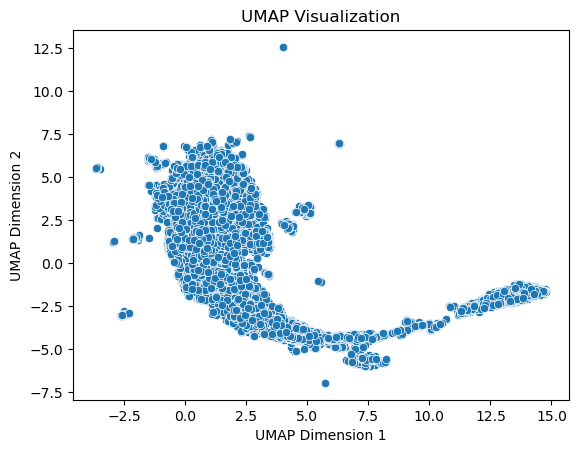

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the embedding
embedding_df = pd.DataFrame(embedding, columns=[f"UMAP Dimension {i+1}" for i in range(embedding.shape[1])])


# Visualize the embedding with labels using seaborn
sns.scatterplot(data=embedding_df, x="UMAP Dimension 1", y="UMAP Dimension 2")
plt.title('UMAP Visualization')
plt.show()

In [131]:
df2

,Protein
0,9606.ENSP00000007722
1,9606.ENSP00000016171
2,9606.ENSP00000053468
3,9606.ENSP00000184266
4,9606.ENSP00000203407
...,...
198,9606.ENSP00000441953
199,9606.ENSP00000457513
200,9606.ENSP00000466834
201,9606.ENSP00000483300


In [139]:
import pandas as pd

df1 = pd.read_csv('Achilles//Protein_Subset_Positive.csv', sep='\t')
df2 = pd.read_csv('Achilles//Protein_Subset_Positive_Pancreas.csv', sep='\t')

# Check if each entry in df2 is present in df1
is_in_df1 = df2['Protein'].isin(df1['Protein'])

# Count the number of entries in df2 that are also in df1
num_entries_in_df1 = is_in_df1.sum()

# Calculate the percentage of entries in df2 that are in df1
percentage_entries_in_df1 = (num_entries_in_df1 / df2.shape[0]) * 100

print(f"Percentage of entries in df2 that are also in df1: {percentage_entries_in_df1}%")


Percentage of entries in df2 that are also in df1: 72.9064039408867%


In [62]:
subset_df.to_csv('1000Prot_RF.csv', index=False)


# FAVA Parralel Run

#### FAVA install & imports

In [9]:
%%capture 

!pip install favapy
!Rscript -e 'install.packages("plotly", repos="https://cloud.r-project.org")'
!Rscript -e 'install.packages("igraph", repos="https://cloud.r-project.org")'
!Rscript -e 'install.packages("cowplot", repos="https://cloud.r-project.org")'
#!pip install numpy scikit-learn
#!pip install fancyimpute

In [10]:
import os 
import pandas as pd
import itertools
import csv
import numpy as np 
from favapy import fava


def Annot_network(network = 'Homo_Sapiens_Scaled.txt',alias = "STRING proteins//9606.protein.aliases.v11.5.txt"):
    dict = {}
    with open(alias) as f:
        next(f)
        for line in f:
            a = line.split("\t")
            dict[a[1]] = a[0]
    network = pd.read_csv(network,sep="\t", header = 0)

    identifiers_1 = [dict.get(key) for key in network.iloc[:,1]]
    identifiers_1_df = pd.DataFrame(identifiers_1)

    identifiers_2 = [dict.get(key) for key in network.iloc[:,2]]
    identifiers_2_df = pd.DataFrame(identifiers_2)

    network_ensps = pd.concat([identifiers_1_df,identifiers_2_df],axis=1)
    final_pairs = pd.concat([network_ensps,network.iloc[:,3]],axis=1)
    final_network = final_pairs.dropna()
    
    return final_network


#### SVD & Evaluation

In [13]:
!pip install numpy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 33.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.9 MB/s eta 0:00:0000:01


In [17]:
import pandas as pd
import numpy as np
from scipy.linalg import svd

# Load your dataset into a pandas DataFrame
# Assuming your DataFrame is named 'protein_data'
# Rows represent proteins and columns represent samples
# Missing values are represented as NaN
FAVA_Matrix = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col=0)
FAVA_Matrix = FAVA_Matrix.dropna()
protein_data = FAVA_Matrix

# Fill missing values with zeros


# Perform SVD on the protein_data
U, S, Vt = svd(protein_data.values, full_matrices=False)

# Set the desired number of dimensions (latent space)
num_dimensions = 10

# Reduce the dimensions using SVD
reduced_data = np.dot(U[:, :num_dimensions], np.diag(S[:num_dimensions]))

df2 = pd.DataFrame(reduced_data)
df2.index = FAVA_Matrix.index
df = df2.transpose()

# Compute the correlation matrix using Pearson correlation coefficient
corr_matrix = df.corr(method='pearson')

# Set a threshold for the correlation coefficient
threshold = 0.5

# Filter the correlation matrix to only include pairs with correlation coefficient above the threshold
high_corr_pairs = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()

# Rename the columns of the filtered pairs dataframe
high_corr_pairs.columns = ['Protein_1', 'Protein_2', 'Score']
Network = high_corr_pairs

In [3]:
FAVA_Matrix = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col = 0)
Model = pd.read_csv('Achilles//Model.csv', sep=',', index_col = 0)

In [4]:
import pandas as pd
import numpy as np
from scipy.linalg import svd

import pandas as pd

# Assuming your DataFrame is named `df`
unique_entries = Model['OncotreePrimaryDisease'].unique()
sub_dataframes = {}

for entry in unique_entries:
    sub_dataframes[entry] = Model[Model['OncotreePrimaryDisease'] == entry]

sub_dataframes_with_columns = {}

for entry, sub_df in sub_dataframes.items():
    filter_columns = sub_df.index.intersection(FAVA_Matrix.columns)
    sub_dataframes_with_columns[entry] = FAVA_Matrix[filter_columns]

# Get the set of all columns in sub_dataframes_with_columns
represented_columns = set()
for sub_df_columns in sub_dataframes_with_columns.values():
    represented_columns.update(sub_df_columns.columns)

# Find the columns in FAVA_Matrix that are not represented
unrepresented_columns = list(set(FAVA_Matrix.columns) - represented_columns)

# Create the sub-dataframe with the unrepresented columns
sub_dataframes_unrepresented = FAVA_Matrix[unrepresented_columns]



In [8]:
import pandas as pd
import numpy as np
from scipy.linalg import svd

# Function to apply SVD transformation
def apply_svd(data, num_dimensions):
    # Fill missing values with zeros
    data.fillna(0, inplace=True)

    # Perform SVD on the data
    U, S, Vt = svd(data.values, full_matrices=False)

    # Reduce the dimensions using SVD
    reduced_data = np.dot(U[:, :num_dimensions], np.diag(S[:num_dimensions]))

    df2 = pd.DataFrame(reduced_data)
    df2.index = data.index
    return df2

# Apply SVD on dataframes with more than 5 columns
num_dimensions = 5
svd_dataframes = {}

for entry, sub_df in sub_dataframes_with_columns.items():
    if len(sub_df.columns) > 20:
        svd_dataframes[entry] = apply_svd(sub_df, num_dimensions)
    else:
        svd_dataframes[entry] = sub_df
        


# Concatenate all columns from svd_dataframes
concatenated_svd_df = pd.concat(svd_dataframes.values(), axis=1)

# Concatenate columns from sub_dataframes_unrepresented
final_df = pd.concat([concatenated_svd_df, sub_dataframes_unrepresented], axis=1)

# Compute the correlation matrix using Pearson correlation coefficient
df = final_df.transpose()

corr_matrix = df.corr(method='pearson')

# Set a threshold for the correlation coefficient
threshold = 0.3

# Filter the correlation matrix to only include pairs with correlation coefficient above the threshold
high_corr_pairs = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()

# Rename the columns of the filtered pairs dataframe
high_corr_pairs.columns = ['Protein_1', 'Protein_2', 'Score']
Network = high_corr_pairs

In [ ]:
Network

,Protein_1,Protein_2,Score
0,A1BG,A1BG,1.000000
1,A1BG,A1CF,0.592714
2,A1BG,A2M,0.667391
3,A1BG,A2ML1,0.653112
4,A1BG,A3GALT2,0.777851
...,...,...,...
319746674,ZZZ3,ZYG11A,0.781101
319746675,ZZZ3,ZYG11B,0.797703
319746676,ZZZ3,ZYX,0.717001
319746677,ZZZ3,ZZEF1,0.704873


Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘igraph’

The following object is masked from ‘package:plotly’:

    groups

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message:
In geom_point(data = df1, aes(x = fp_cum, y = tp_cum, key = score),  :
  Ignoring unknown aesthetics: key


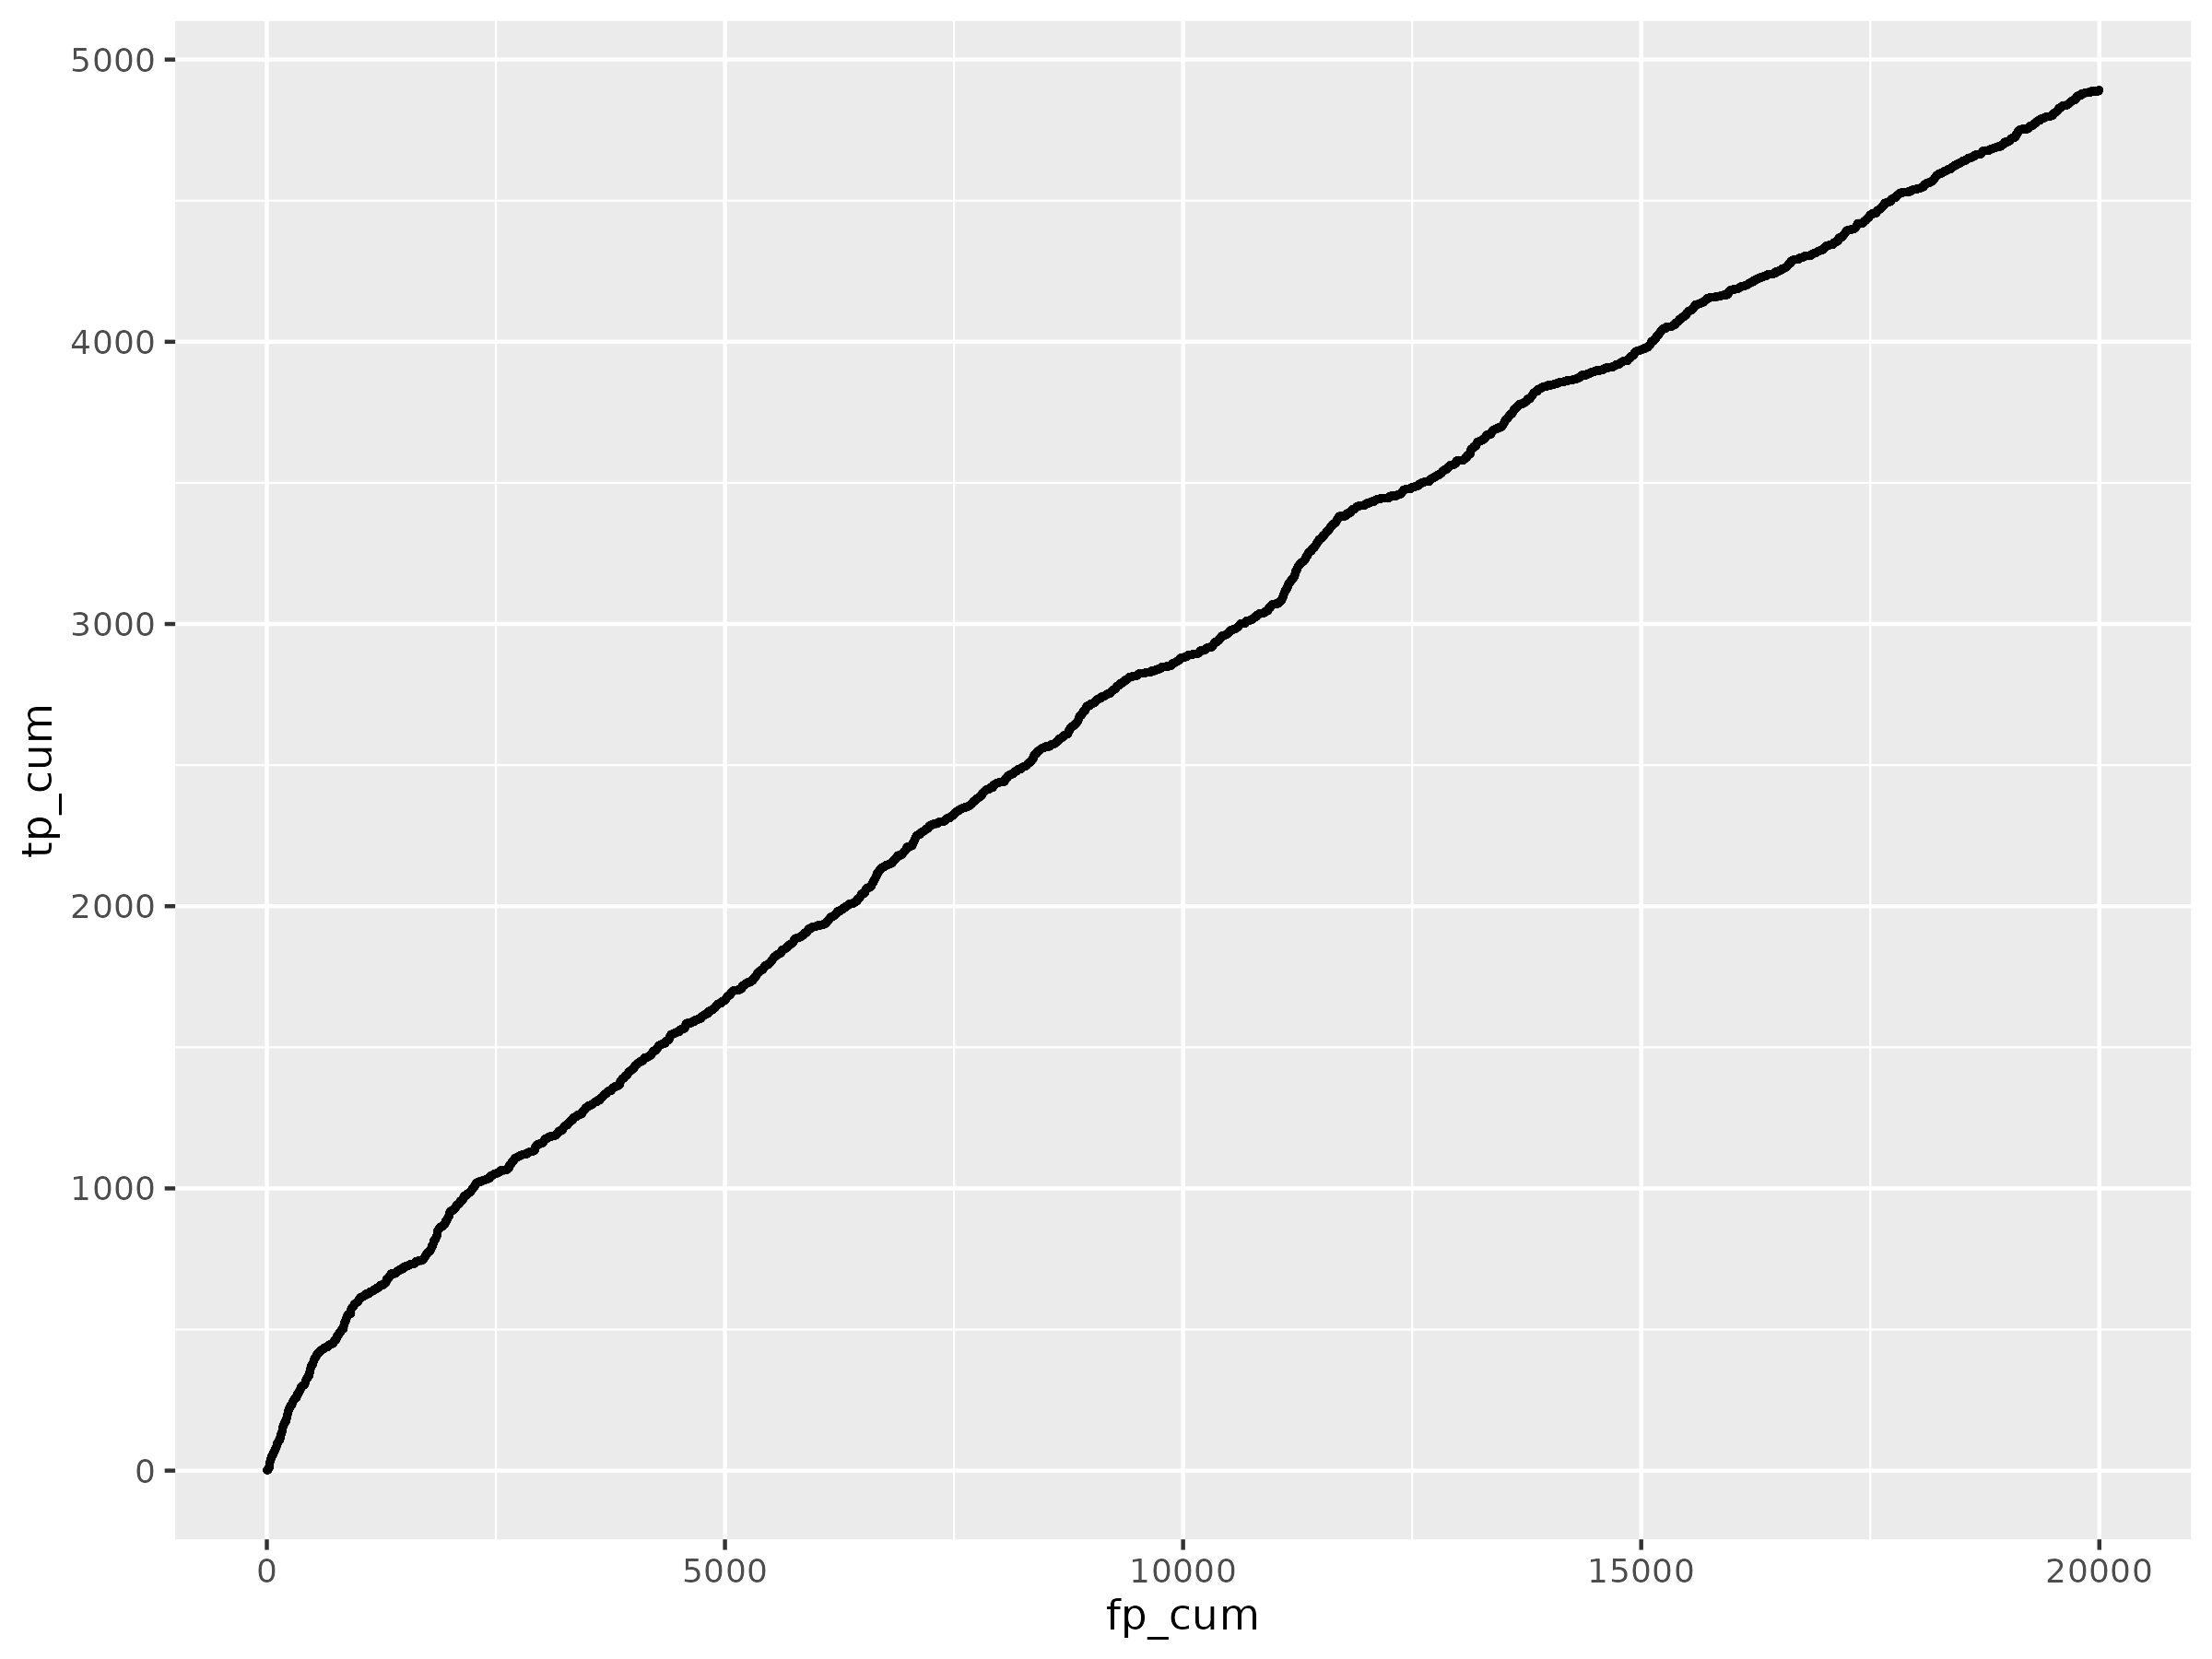

In [18]:

Network = Network[Network['Protein_1'] != Network['Protein_2']]
Network = Network.nlargest(200000, 'Score')
Network.to_csv('Networks//Achilles.txt',sep='\t')
final_network = Annot_network('Networks//Achilles.txt',"STRING proteins//9606.protein.aliases.v11.5.txt")
final_network.to_csv('Networks//Homo_Sapiens.tsv',sep='\t',header = False)
CommandLineAchilles()
!Rscript benchmark_plot_coX.R 'Benchmark_Kegg_Networks//Achilles_benchmark_kegg.tsv' 'Roc_png//Achilles_benchmark_kegg2.png' 
from IPython.display import Image
Image("Roc_png//Achilles_benchmark_kegg2.png")

## FAVA 

In [4]:
########## Data Sets #############
import pandas as pd
############ Raw Read Counts ############
#df1 = pd.read_csv('Achilles_Matrices//AvanaRawCounts_CorrelationMatrix.txt', sep='\t', index_col = 0)
#df2 = pd.read_csv('Achilles_Matrices//KYRawCounts_CorrelationMatrix.txt', sep='\t', index_col = 0)

########## L2FC ###############
#df1 = pd.read_csv('Achilles_Matrices//AvanaLogFoldchange_CorrelationMatrix.txt', sep='\t', index_col = 0)
#df2 = pd.read_csv('Achilles_Matrices//KYLogFoldchange_CorrelationMatrix.txt', sep='\t', index_col = 0)

######### Naive Gene Score ##
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//ScreenNaiveGeneScore_CorrelationMatrix.txt', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//CRISPRGeneEffect_CorrelationMatrix.csv', sep='\t', index_col = 0)

##### Gene Dependency ############
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//ScreenGeneDependency_CorrelationMatrix.txt', sep='\t', index_col = 0)
FAVA_Matrix = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col = 0)

#################### Test Sets ##################
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//RawFilterTest_CorrelationMatrix.txt', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('Example_dataset_GSE75748_sc_cell_type_ec.tsv', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//AvanaRaw_Filtered_CorrelationMatrix.txt', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//AvanaLF_Filtered_CorrelationMatrix.txt', sep='\t', index_col = 0)

############# HighVarianceGene ##################
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//AvanaRaw_HighVarianceGene_CorrelationMatrix.txt', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//AvanaLF_HighVarianceGene_CorrelationMatrix.txt', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//GeneDep_HighVarianceGene_CorrelationMatrix.txt', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('Achilles_Matrices//NaiveGene_HighVarianceGene_CorrelationMatrix.txt', sep='\t', index_col = 0)
#FAVA_Matrix = pd.read_csv('1000Prot_RF_UMAP_2.csv', sep=',')


#

In [5]:
FAVA_Matrix

,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,...,ACH-002687,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002926
A1BG,0.055321,0.023418,0.059552,0.023880,0.027652,0.011752,0.054350,0.012408,0.040318,0.048144,...,0.052761,0.047661,0.045288,0.058705,0.048792,0.019522,0.035125,0.032003,0.024223,0.031844
A1CF,0.014039,0.048724,0.025478,0.035082,0.074860,0.018515,0.012480,0.056549,0.060836,0.019915,...,0.024764,0.134459,0.038412,0.041521,0.019704,0.048489,0.054841,0.045283,0.011662,0.030943
A2M,0.014084,0.058084,0.009989,0.006556,0.011021,0.006061,0.007296,0.017932,0.006576,0.015796,...,0.004601,0.042589,0.007726,0.011676,0.011127,0.003258,0.015211,0.014737,0.012255,0.005662
A2ML1,0.033828,0.019483,0.008775,0.004322,0.009153,0.001281,0.004775,0.006095,0.004405,0.003001,...,0.001275,0.003605,0.011175,0.008310,0.009530,0.008269,0.016620,0.010463,0.000397,0.002768
A3GALT2,0.049511,0.049793,0.099322,0.022200,0.021632,0.069164,0.017181,0.087864,0.028969,0.032881,...,0.048573,0.032802,0.098049,0.173271,0.093615,0.203445,0.154514,0.086174,0.135939,0.082585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.154849,0.015507,0.097357,0.029261,0.053355,0.011182,0.011567,0.034543,0.017696,0.010675,...,0.028127,0.175865,0.037863,0.050344,0.039956,0.032515,0.020362,0.037763,0.034875,0.016419
ZYG11B,0.015792,0.319598,0.066269,0.369101,0.651365,0.096540,0.036698,0.047371,0.070336,0.068188,...,0.172399,0.208043,0.075282,0.134294,0.089663,0.155789,0.017330,0.145848,0.177452,0.157046
ZYX,0.015999,0.007778,0.025365,0.015412,0.012016,0.012946,0.064189,0.031213,0.037093,0.066161,...,0.106191,0.019738,0.221027,0.066985,0.046708,0.037765,0.224894,0.138299,0.056826,0.007495
ZZEF1,0.006200,0.004392,0.042530,0.165622,0.023990,0.050701,0.037076,0.068899,0.002413,0.051896,...,0.034599,0.112035,0.023734,0.068914,0.007272,0.034490,0.054621,0.053118,0.013545,0.052518


In [6]:
FAVA_Matrix = pd.concat([df1, df2], axis=1)
FAVA_Matrix = FAVA_Matrix.fillna(0) 
#FAVA_Matrix = FAVA_Matrix.applymap(lambda x: np.log1p(x))

#FAVA_Matrix.to_csv('GeneL2FC_Avana_KY.tsv',sep='\t')

In [7]:

FAVA_Matrix

,Colo699-311cas9-RepA-p6_Avana-4,Colo699-311cas9-RepB-p6_Avana-4,HSB-2-311cas9_RepA_p4_Avana-3,HSB-2-311cas9_RepB_p4_Avana-3,NCIH1339-311Cas9_RepA_p6_Avana-3,NCIH1339-311Cas9_RepB_p6_Avana-3,HEL-311Cas9_RepA_p4_Avana-3,HEL-311Cas9_RepB_p4_Avana-3,HEL9217-311Cas9_RepA_p6_Avana-3,HEL9217-311Cas9_RepB_p6_Avana-3,...,U893_c903R3_KY-2,UWB12_c905R1_KY-1,UWB12_c905R2_KY-1,UWB12_c905R3_KY-1,YH13_c907R1_KY-1,YH13_c907R2_KY-1,no10_c907R1_KY-1,no10_c907R2_KY-1,no11_c907R1_KY-1,no11_c907R2_KY-1
A1BG,0.019573,-0.310899,0.231598,-0.063760,0.104135,0.210826,0.027583,0.275760,-0.202558,0.215264,...,0.168705,0.252291,0.112528,0.115267,-0.997891,-0.659644,0.185592,-0.215384,-0.442998,-0.120967
A1CF,0.031618,0.106410,0.290259,0.076672,-0.014286,0.129658,0.128577,-0.206039,0.125579,0.031214,...,-0.366361,0.137373,0.039950,0.044936,-1.317936,1.144168,-0.221167,0.104268,-1.036782,0.044282
A2M,-0.002543,-0.007358,-0.208122,-0.347252,-0.141269,0.175003,-0.317146,-0.517377,-0.114188,0.165128,...,0.090390,-0.304982,0.087585,0.343495,-0.080846,0.712632,0.112518,0.103309,-0.023992,-0.834504
A2ML1,0.231645,0.154302,0.047601,0.057306,0.152719,-0.152819,-0.001918,-0.035633,0.107480,0.104673,...,0.192860,0.254719,-0.073551,0.076277,-0.457453,-0.572573,-0.005202,0.520619,-0.426034,-0.877520
A3GALT2,-0.003012,-0.403654,0.254423,0.068410,-0.098368,-0.159213,-0.114614,0.340749,-0.108937,-0.210419,...,-0.145031,-0.294392,-0.352904,-0.022288,-1.211930,-0.079143,0.006843,-0.213150,-0.222587,-0.784206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.553110,-0.279729,0.175211,-0.344661,0.920414,-0.544419,0.264800,0.472008,-0.000605,0.161828
ZNF716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014161,0.210722,0.408420,0.111912,-0.181866,-0.215496,0.016671,0.362825,0.229913,0.640627
ZNF732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.085541,0.116222,0.390485,-0.254758,-0.431599,-0.500850,0.506666,0.407580,0.040793,-0.221370
ZNF85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.230336,0.939044,0.416950,0.004403,0.301405,0.335286,0.255627,-0.392158,0.229748,-0.039829


In [38]:
df1 =  pd.read_csv('ProteinID_1000Prot_RF.csv', sep=',')
df2 = pd.read_csv('ProteinID_1000Prot_RF_UMAP_2.csv', sep=',')
merged_df = pd.merge(df1, df2, on='Protein', how='inner')
# Calculate percentage identity
percentage_identity = (len(merged_df) / (len(df1['Protein'].unique()) + len(df2['Protein'].unique()))) * 100

print(f"Percentage Identity: {percentage_identity}%")

Percentage Identity: 2.85%


In [11]:
# Retrieve the highest value
highest_value = FAVA_Matrix.max().max()

# Retrieve the lowest value
lowest_value = FAVA_Matrix.min().min()

print("Highest value:", highest_value)
print("Lowest value:", lowest_value)


Highest value: 1.0
Lowest value: 0.0


In [27]:
# Maybe wrong?????
FAVA_Matrix = FAVA_Matrix.dropna()
FAVA_Matrix 

,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,...,ACH-002687,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002926
A1BG,-0.102725,0.008878,-0.117950,-0.049135,0.004969,0.030739,-0.114470,0.041931,-0.089175,-0.119207,...,-0.105369,-0.082031,-0.062391,-0.103043,-0.079226,-0.000591,-0.046332,-0.036301,-0.036065,-0.074473
A1CF,0.058595,-0.077633,0.013989,-0.089991,-0.098170,-0.020638,0.024994,-0.107731,-0.134861,-0.037772,...,-0.021444,-0.211685,-0.044919,-0.059908,0.007326,-0.118200,-0.105593,-0.074850,0.024183,-0.071863
A2M,0.058246,-0.099297,0.164099,0.084994,0.092887,0.107100,0.072702,0.006959,0.099927,-0.017436,...,0.164974,-0.069498,0.133766,0.092410,0.059009,0.264553,0.072203,0.052350,0.020325,0.080549
A2ML1,-0.041881,0.030120,0.184570,0.129586,0.110913,0.277480,0.111578,0.108032,0.143792,0.128192,...,0.300899,0.172563,0.086937,0.136601,0.073257,0.117171,0.058669,0.097964,0.265791,0.160242
A3GALT2,-0.088661,-0.080334,-0.201766,-0.041561,0.028599,-0.173658,-0.003644,-0.156066,-0.053973,-0.083029,...,-0.096042,-0.041399,-0.150077,-0.258347,-0.149714,-0.323325,-0.254654,-0.150341,-0.215378,-0.169029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.250381,0.056322,-0.198378,-0.070598,-0.061208,0.036303,0.031763,-0.057019,-0.002942,0.016498,...,-0.035428,-0.251612,-0.043417,-0.083625,-0.059303,-0.066423,0.028762,-0.054613,-0.068547,-0.015172
ZYG11B,0.045612,-0.355712,-0.135007,-0.412361,-0.537773,-0.216287,-0.074691,-0.089171,-0.151649,-0.154022,...,-0.252382,-0.278572,-0.118644,-0.217946,-0.144680,-0.280812,0.052414,-0.220010,-0.252023,-0.244898
ZYX,0.044154,0.135310,0.014708,-0.003722,0.084630,0.019742,-0.132231,-0.046902,-0.080177,-0.150984,...,-0.188122,0.010794,-0.263436,-0.120144,-0.074774,-0.085753,-0.320080,-0.212531,-0.115682,0.054218
ZZEF1,0.146801,0.200408,-0.065341,-0.277756,0.018678,-0.135918,-0.075676,-0.128962,0.213857,-0.126498,...,-0.058331,-0.186362,0.005191,-0.123813,0.098224,-0.074035,-0.105069,-0.092958,0.012275,-0.122246


In [9]:
df = FAVA_Matrix
mask = df.isna()

df = df.fillna(df.mean())

    
for col in df:
    Scaled = df[col].values
    
    
    Scaled -= Scaled.min()  # equivalent to df = df - df.min()
    Scaled /= Scaled.max()  

    # replace the original column with the scaled values
    df[col] = Scaled
    

df = df.mask(mask)
FAVA_Matrix = df

In [12]:
FAVA_Matrix.to_csv('GeneL2FC_Avana_KY.tsv',sep='\t')

In [3]:
FAVA_Matrix = pd.read_csv('GeneL2FC_Avana_KY.tsv', sep='\t', index_col = 0)
FAVA_Matrix

,Colo699-311cas9-RepA-p6_Avana-4,Colo699-311cas9-RepB-p6_Avana-4,HSB-2-311cas9_RepA_p4_Avana-3,HSB-2-311cas9_RepB_p4_Avana-3,NCIH1339-311Cas9_RepA_p6_Avana-3,NCIH1339-311Cas9_RepB_p6_Avana-3,HEL-311Cas9_RepA_p4_Avana-3,HEL-311Cas9_RepB_p4_Avana-3,HEL9217-311Cas9_RepA_p6_Avana-3,HEL9217-311Cas9_RepB_p6_Avana-3,...,U893_c903R3_KY-2,UWB12_c905R1_KY-1,UWB12_c905R2_KY-1,UWB12_c905R3_KY-1,YH13_c907R1_KY-1,YH13_c907R2_KY-1,no10_c907R1_KY-1,no10_c907R2_KY-1,no11_c907R1_KY-1,no11_c907R2_KY-1
A1BG,0.483874,0.443301,0.786257,0.663136,0.806894,0.692855,0.823464,0.853704,0.625999,0.809858,...,0.843719,0.825148,0.786809,0.803959,0.715919,0.749848,0.900489,0.847153,0.858327,0.853487
A1CF,0.486646,0.535336,0.809336,0.714551,0.778641,0.676782,0.838012,0.763312,0.724944,0.743026,...,0.780447,0.801674,0.774693,0.789889,0.685031,0.926339,0.855242,0.883832,0.799685,0.872548
A2M,0.478785,0.510245,0.613255,0.559342,0.748346,0.685761,0.773806,0.704901,0.652646,0.791653,...,0.834458,0.711313,0.782645,0.849615,0.804423,0.884116,0.892360,0.883723,0.899709,0.771182
A2ML1,0.532679,0.545898,0.713866,0.707461,0.818485,0.620843,0.819215,0.795283,0.719487,0.769700,...,0.846575,0.825644,0.755745,0.796159,0.768076,0.758368,0.879265,0.931608,0.860003,0.766220
A3GALT2,0.478677,0.422844,0.795237,0.711526,0.758581,0.619577,0.802981,0.865897,0.654229,0.655285,...,0.806620,0.713477,0.709110,0.776442,0.695262,0.806646,0.880605,0.847410,0.880095,0.776984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF676,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.758364,0.716472,0.797273,0.711952,0.901054,0.761122,0.909299,0.926030,0.902018,0.886107
ZNF716,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.825444,0.816657,0.836205,0.803288,0.794673,0.793305,0.881698,0.913501,0.924785,0.941335
ZNF732,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.813654,0.797353,0.833211,0.729937,0.770571,0.765385,0.936204,0.918637,0.906107,0.841905
ZNF85,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.678282,0.965432,0.837629,0.781781,0.841314,0.847195,0.908279,0.826869,0.924768,0.862846


In [82]:
# Join the dataframes based on their row names (index)
merged_df = FAVA_Matrix.join(cluster_6_df, how='left', lsuffix='_FAVA_Matrix', rsuffix='_cluster_6')

# Filter out the rows in FAVA_Matrix with indices present in cluster_6_df
filtered_df = FAVA_Matrix[~FAVA_Matrix.index.isin(cluster_6_df.index)]


FAVA_Matrix = filtered_df


In [10]:
FAVA_Matrix

,Colo699-311cas9-RepA-p6_Avana-4,Colo699-311cas9-RepB-p6_Avana-4,HSB-2-311cas9_RepA_p4_Avana-3,HSB-2-311cas9_RepB_p4_Avana-3,NCIH1339-311Cas9_RepA_p6_Avana-3,NCIH1339-311Cas9_RepB_p6_Avana-3,HEL-311Cas9_RepA_p4_Avana-3,HEL-311Cas9_RepB_p4_Avana-3,HEL9217-311Cas9_RepA_p6_Avana-3,HEL9217-311Cas9_RepB_p6_Avana-3,...,U893_c903R3_KY-2,UWB12_c905R1_KY-1,UWB12_c905R2_KY-1,UWB12_c905R3_KY-1,YH13_c907R1_KY-1,YH13_c907R2_KY-1,no10_c907R1_KY-1,no10_c907R2_KY-1,no11_c907R1_KY-1,no11_c907R2_KY-1
A1BG,0.483874,0.443301,0.786257,0.663136,0.806894,0.692855,0.823464,0.853704,0.625999,0.809858,...,0.843719,0.825148,0.786809,0.803959,0.715919,0.749848,0.900489,0.847153,0.858327,0.853487
A1CF,0.486646,0.535336,0.809336,0.714551,0.778641,0.676782,0.838012,0.763312,0.724944,0.743026,...,0.780447,0.801674,0.774693,0.789889,0.685031,0.926339,0.855242,0.883832,0.799685,0.872548
A2M,0.478785,0.510245,0.613255,0.559342,0.748346,0.685761,0.773806,0.704901,0.652646,0.791653,...,0.834458,0.711313,0.782645,0.849615,0.804423,0.884116,0.892360,0.883723,0.899709,0.771182
A2ML1,0.532679,0.545898,0.713866,0.707461,0.818485,0.620843,0.819215,0.795283,0.719487,0.769700,...,0.846575,0.825644,0.755745,0.796159,0.768076,0.758368,0.879265,0.931608,0.860003,0.766220
A3GALT2,0.478677,0.422844,0.795237,0.711526,0.758581,0.619577,0.802981,0.865897,0.654229,0.655285,...,0.806620,0.713477,0.709110,0.776442,0.695262,0.806646,0.880605,0.847410,0.880095,0.776984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF676,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.758364,0.716472,0.797273,0.711952,0.901054,0.761122,0.909299,0.926030,0.902018,0.886107
ZNF716,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.825444,0.816657,0.836205,0.803288,0.794673,0.793305,0.881698,0.913501,0.924785,0.941335
ZNF732,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.813654,0.797353,0.833211,0.729937,0.770571,0.765385,0.936204,0.918637,0.906107,0.841905
ZNF85,0.479370,0.511867,0.695138,0.686480,0.782050,0.651106,0.819491,0.801968,0.687078,0.731692,...,0.678282,0.965432,0.837629,0.781781,0.841314,0.847195,0.908279,0.826869,0.924768,0.862846


In [13]:
def FAVA(data):

    my_FAVAourite_network = fava.cook(data = data,
                                  log2_normalization = False, # If your data are normalized set this to False
                                  hidden_layer = 1000, # If None, it will be adjusted base on the input size.
                                  latent_dim = 100, # If None, it will be adjusted base on the size of the hidden layer.
                                  epochs = 50, 
                                  batch_size = 32,
                                  PCC_cutoff = 0.88)
                                  #interaction_count = 100000)
    return my_FAVAourite_network

In [14]:
Network = FAVA(FAVA_Matrix)
Network

Epoch 1/50
562/562 [==============================] - 42s 71ms/step - loss: 16.9026 - accuracy: 0.0174 - val_loss: 10.8367 - val_accuracy: 0.0222
Epoch 2/50
562/562 [==============================] - 39s 69ms/step - loss: 11.0753 - accuracy: 0.0237 - val_loss: 12.5117 - val_accuracy: 0.0243
Epoch 3/50
562/562 [==============================] - 39s 69ms/step - loss: 10.4908 - accuracy: 0.0265 - val_loss: 9.7757 - val_accuracy: 0.0297
Epoch 4/50
562/562 [==============================] - 40s 70ms/step - loss: 9.9405 - accuracy: 0.0249 - val_loss: 10.4697 - val_accuracy: 0.0315
Epoch 5/50
562/562 [==============================] - 39s 69ms/step - loss: 9.8121 - accuracy: 0.0278 - val_loss: 9.9907 - val_accuracy: 0.0232
Epoch 6/50
562/562 [==============================] - 38s 68ms/step - loss: 9.4676 - accuracy: 0.0275 - val_loss: 9.2489 - val_accuracy: 0.0334
Epoch 7/50
562/562 [==============================] - 38s 68ms/step - loss: 9.4135 - accuracy: 0.0289 - val_loss: 9.2389 - val_acc

INFO:root: A cut-off of 0.88 is applied.


,Protein_1,Protein_2,Score
233818189,RPL9,RSL24D1,0.981185
235470049,RSL24D1,RPL9,0.981185
234267033,RPS17,RPS28,0.980307
234464538,RPS28,RPS17,0.980307
233595957,RPL37,H3-3A,0.980060
...,...,...,...
178585524,NOP14,RRS1,0.880000
222598704,RAD50,TRMT1,0.880000
289606764,TRMT1,RAD50,0.880000
253989447,SLC9A8,C2orf66,0.880000


In [15]:
def CommandLineAchilles():
    !awk -F"\t" '{print $0, "FAVA"}' 'GeneLog_1000H_100L_Network.tsv' > tmp.tsv && mv tmp.tsv 'Dummie.tsv'
    !awk '{print $2,$3,$4,$5}' 'Dummie.tsv' > 'Dummie2.tsv'
    !python3 string_score_benchmark.py 'Dummie2.tsv' 'kegg_benchmarking.CONN_maps_in.v11.9606.tsv' 'none' > 'KEGG_Benchmarked_GeneLog_1000H_100L_Network.tsv'
    return

In [16]:
Network = Network[Network['Protein_1'] != Network['Protein_2']]
Network = Network.nlargest(200000, 'Score')
Network.to_csv('GeneLog_1000H_100L_Network.txt',sep='\t')
final_network = Annot_network('GeneLog_1000H_100L_Network.txt',"9606.protein.aliases.v11.5.txt")
final_network.to_csv('GeneLog_1000H_100L_Network.tsv',sep='\t',header = False)
CommandLineAchilles()

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘igraph’

The following object is masked from ‘package:plotly’:

    groups

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message:
In geom_point(data = df1, aes(x = fp_cum, y = tp_cum, key = score),  :
  Ignoring unknown aesthetics: key


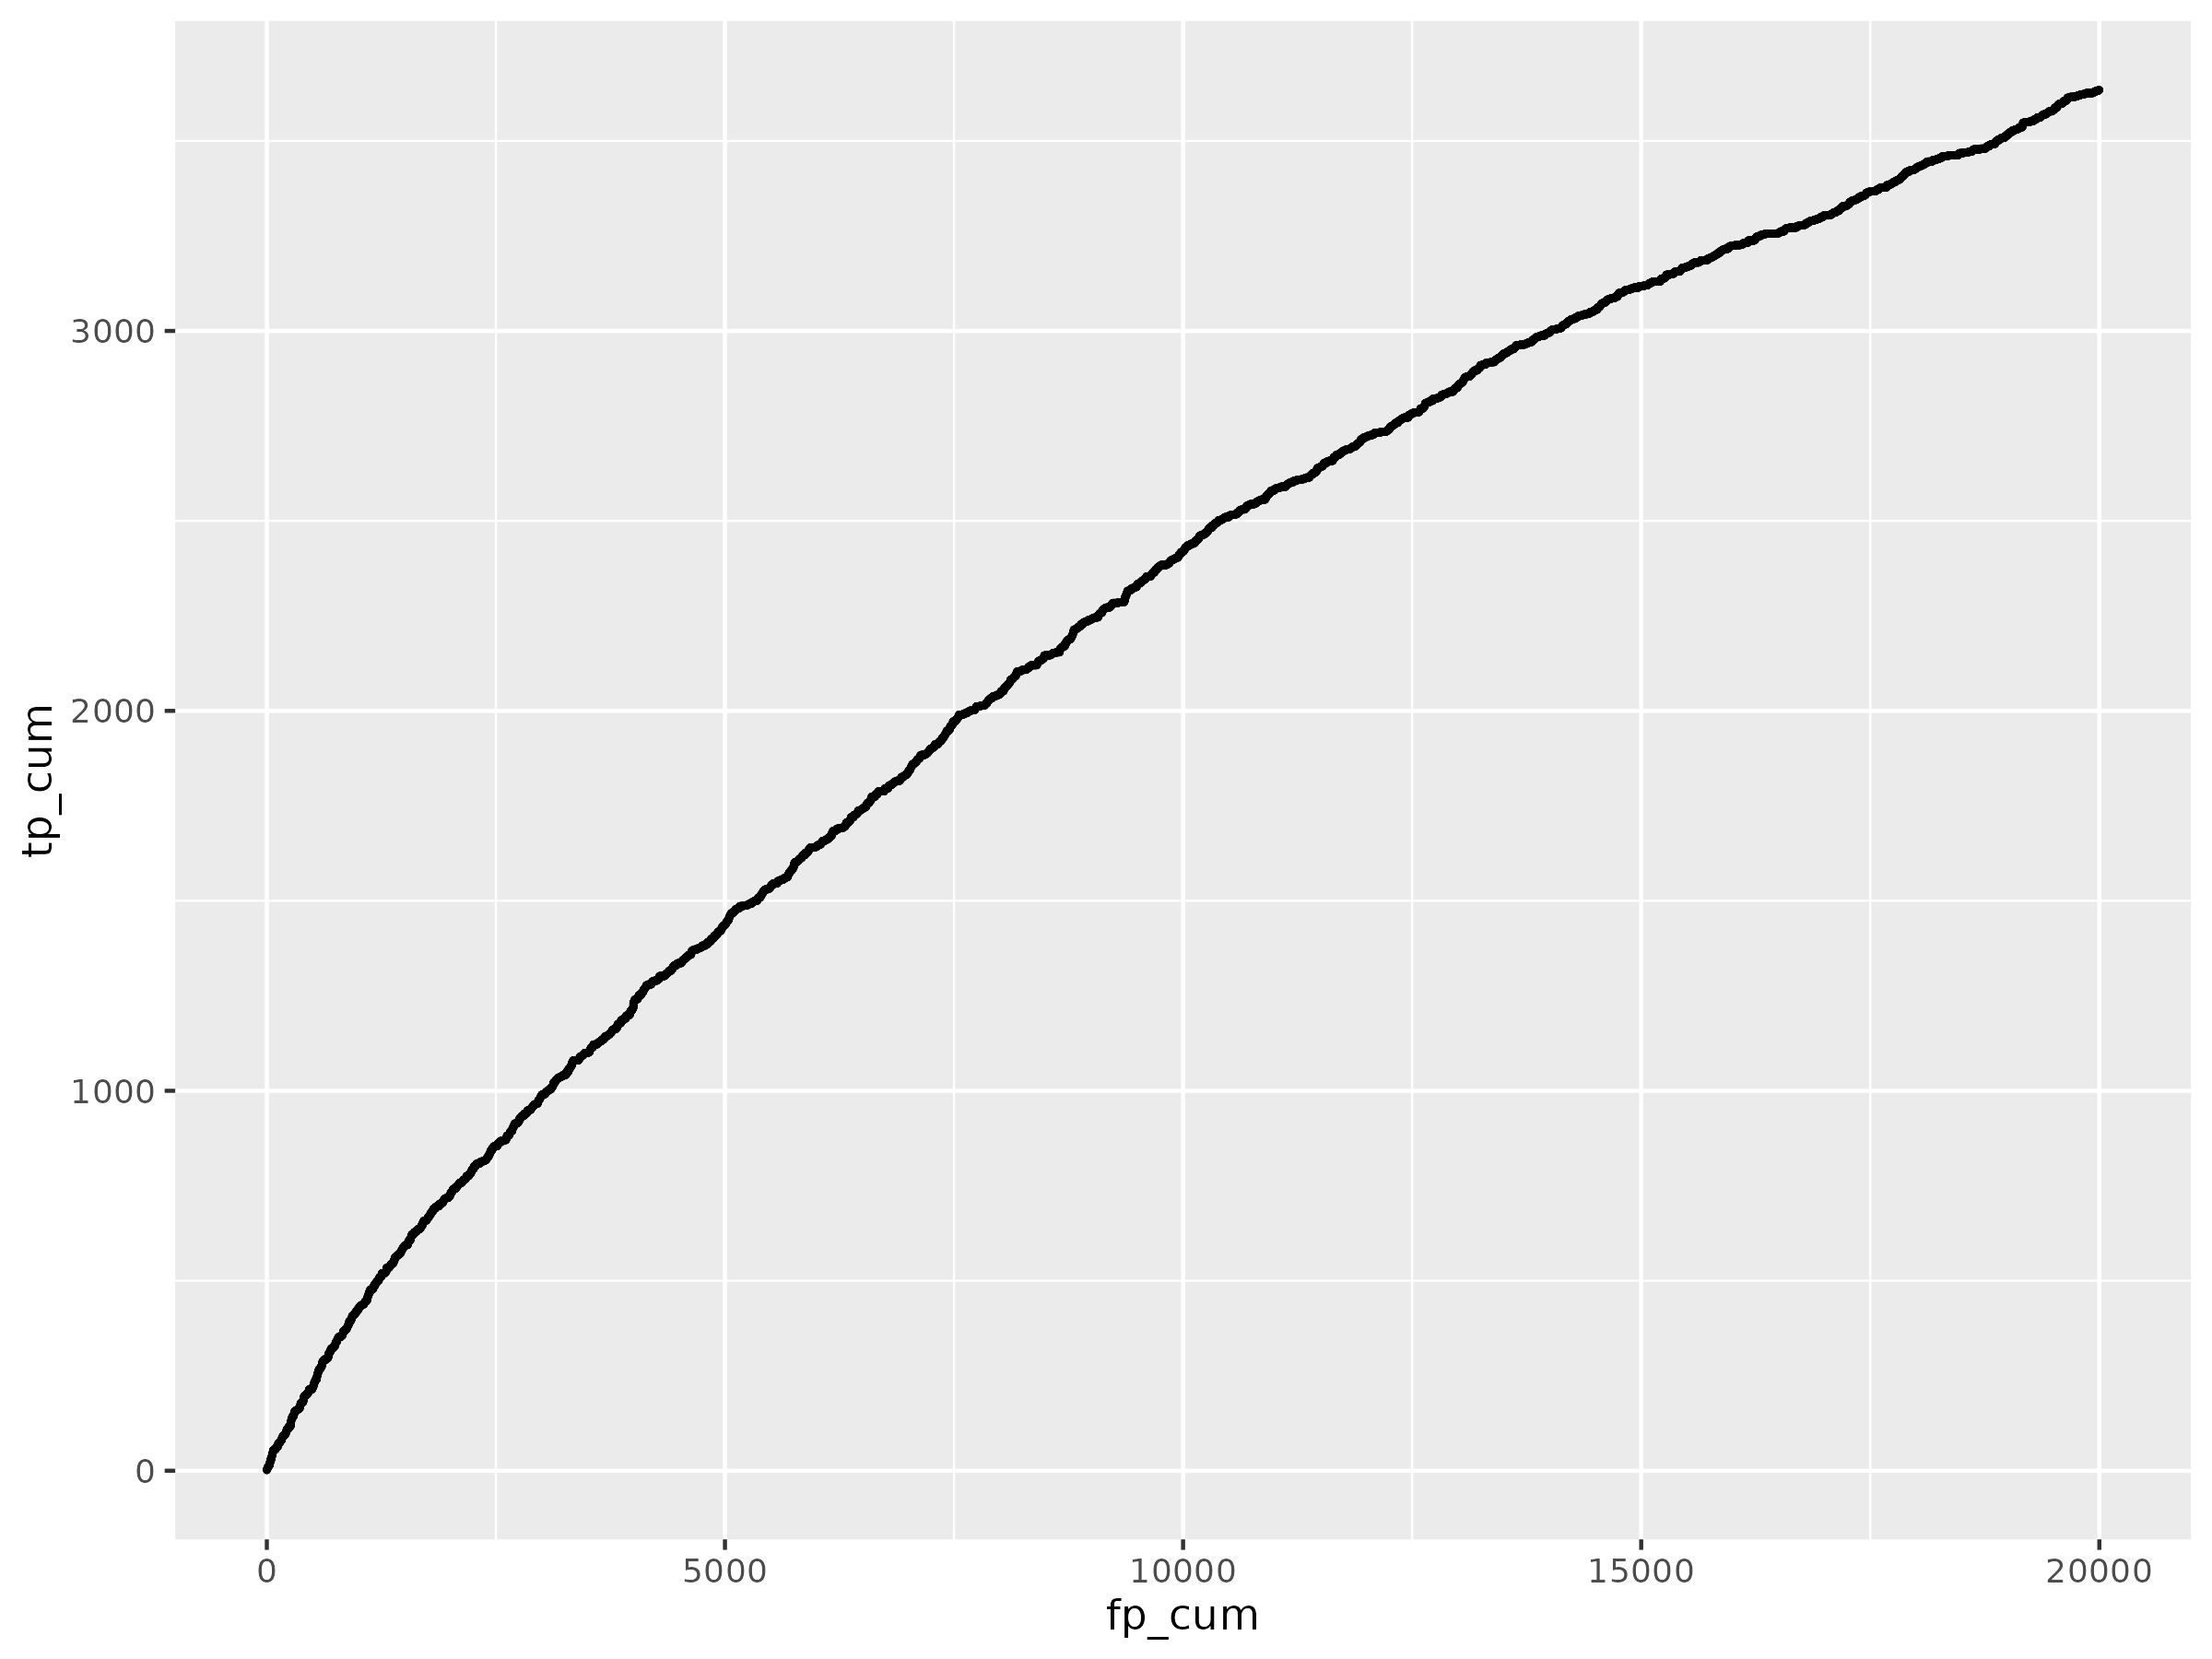

In [17]:
!Rscript benchmark_plot_coX.R 'KEGG_Benchmarked_GeneLog_1000H_100L_Network.tsv' 'Images//KEGG_Benchmarked_GeneLog_1000H_100L_Network.png' 
from IPython.display import Image
Image('Images//KEGG_Benchmarked_GeneLog_1000H_100L_Network.png')

In [13]:
%%capture
!pip install scikit-learn


In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


# Load your data
df  = pd.read_csv('Achilles_Matrices//CRISPRGeneDependency_CorrelationMatrix.csv', sep='\t', index_col = 0)
df = df.fillna(0) 
mask = df.isna()

df = df.fillna(df.mean())

    
for col in df:
    Scaled = df[col].values
    
    
    Scaled -= Scaled.min()  # equivalent to df = df - df.min()
    Scaled /= Scaled.max()  

    # replace the original column with the scaled values
    df[col] = Scaled
    

df = df.mask(mask)


# Perform PCA with 100 components
n_components = 100
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df)

# Create a DataFrame from the reduced data
columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_result, columns=columns, index=df.index)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
A1BG,-3.203038,0.102575,-0.008342,-0.036158,0.014904,0.226698,0.346306,-0.152162,0.040422,-0.060545,...,-0.020937,0.008240,0.073546,0.100131,-0.045830,-0.070022,-0.033537,0.045397,0.006340,0.004059
A1CF,-3.267783,-0.138047,0.001087,0.272220,0.064610,-0.137083,-0.031590,0.122534,-0.244735,-0.068964,...,-0.083911,-0.116964,0.094326,-0.132083,-0.031751,-0.026579,-0.109115,-0.037831,-0.144662,-0.004129
A2M,-4.146892,-0.126084,-0.036224,-0.053249,0.032161,-0.083618,-0.102229,-0.021608,0.032083,0.068602,...,0.016175,-0.017005,0.013441,-0.025386,-0.031143,0.000584,0.012260,0.009421,0.005288,-0.035277
A2ML1,-4.410891,-0.053860,0.133979,-0.006960,0.053854,-0.112464,-0.081695,-0.044505,-0.144480,0.042922,...,0.042644,0.013768,0.017549,-0.020732,-0.006721,0.003280,0.004050,0.005222,0.021843,0.004369
A3GALT2,-1.376672,-0.275370,-0.211498,-0.165689,-0.168014,-0.034918,-0.085373,-0.223596,0.472149,-0.386288,...,-0.017518,-0.021799,0.123061,-0.177790,-0.044136,0.107881,-0.060532,0.077485,0.096958,-0.221339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-3.460734,-0.094031,-0.013456,0.077822,-0.057863,-0.109591,-0.052572,-0.103001,0.070715,-0.081670,...,0.062149,-0.077088,-0.130031,-0.009368,-0.030510,0.015399,-0.001578,0.029860,0.052291,0.013944
ZYG11B,-0.926856,-0.427604,-0.418178,0.234818,-0.235500,0.243135,0.369170,-0.235467,0.163039,-0.003297,...,-0.034438,0.288232,-0.162220,0.089283,-0.150161,-0.069232,-0.010315,0.140333,-0.032739,0.238043
ZYX,-3.134061,-0.217932,0.419226,-0.057195,-0.197190,-0.075337,-0.026155,-0.233245,-0.165092,-0.272433,...,-0.100291,0.009555,-0.015317,-0.019308,0.002853,0.003850,-0.016267,-0.024433,-0.109997,0.004614
ZZEF1,-1.843887,-0.321048,-1.360927,-0.129198,-0.545899,0.053336,0.039791,-0.193250,0.063300,0.028633,...,-0.093881,-0.119394,0.110758,-0.005170,-0.041567,0.017355,-0.130870,-0.019543,0.071155,-0.061249


In [28]:
FAVA_Matrix = pca_df

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘igraph’

The following object is masked from ‘package:plotly’:

    groups

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message:
In geom_point(data = df1, aes(x = fp_cum, y = tp_cum, key = score),  :
  Ignoring unknown aesthetics: key


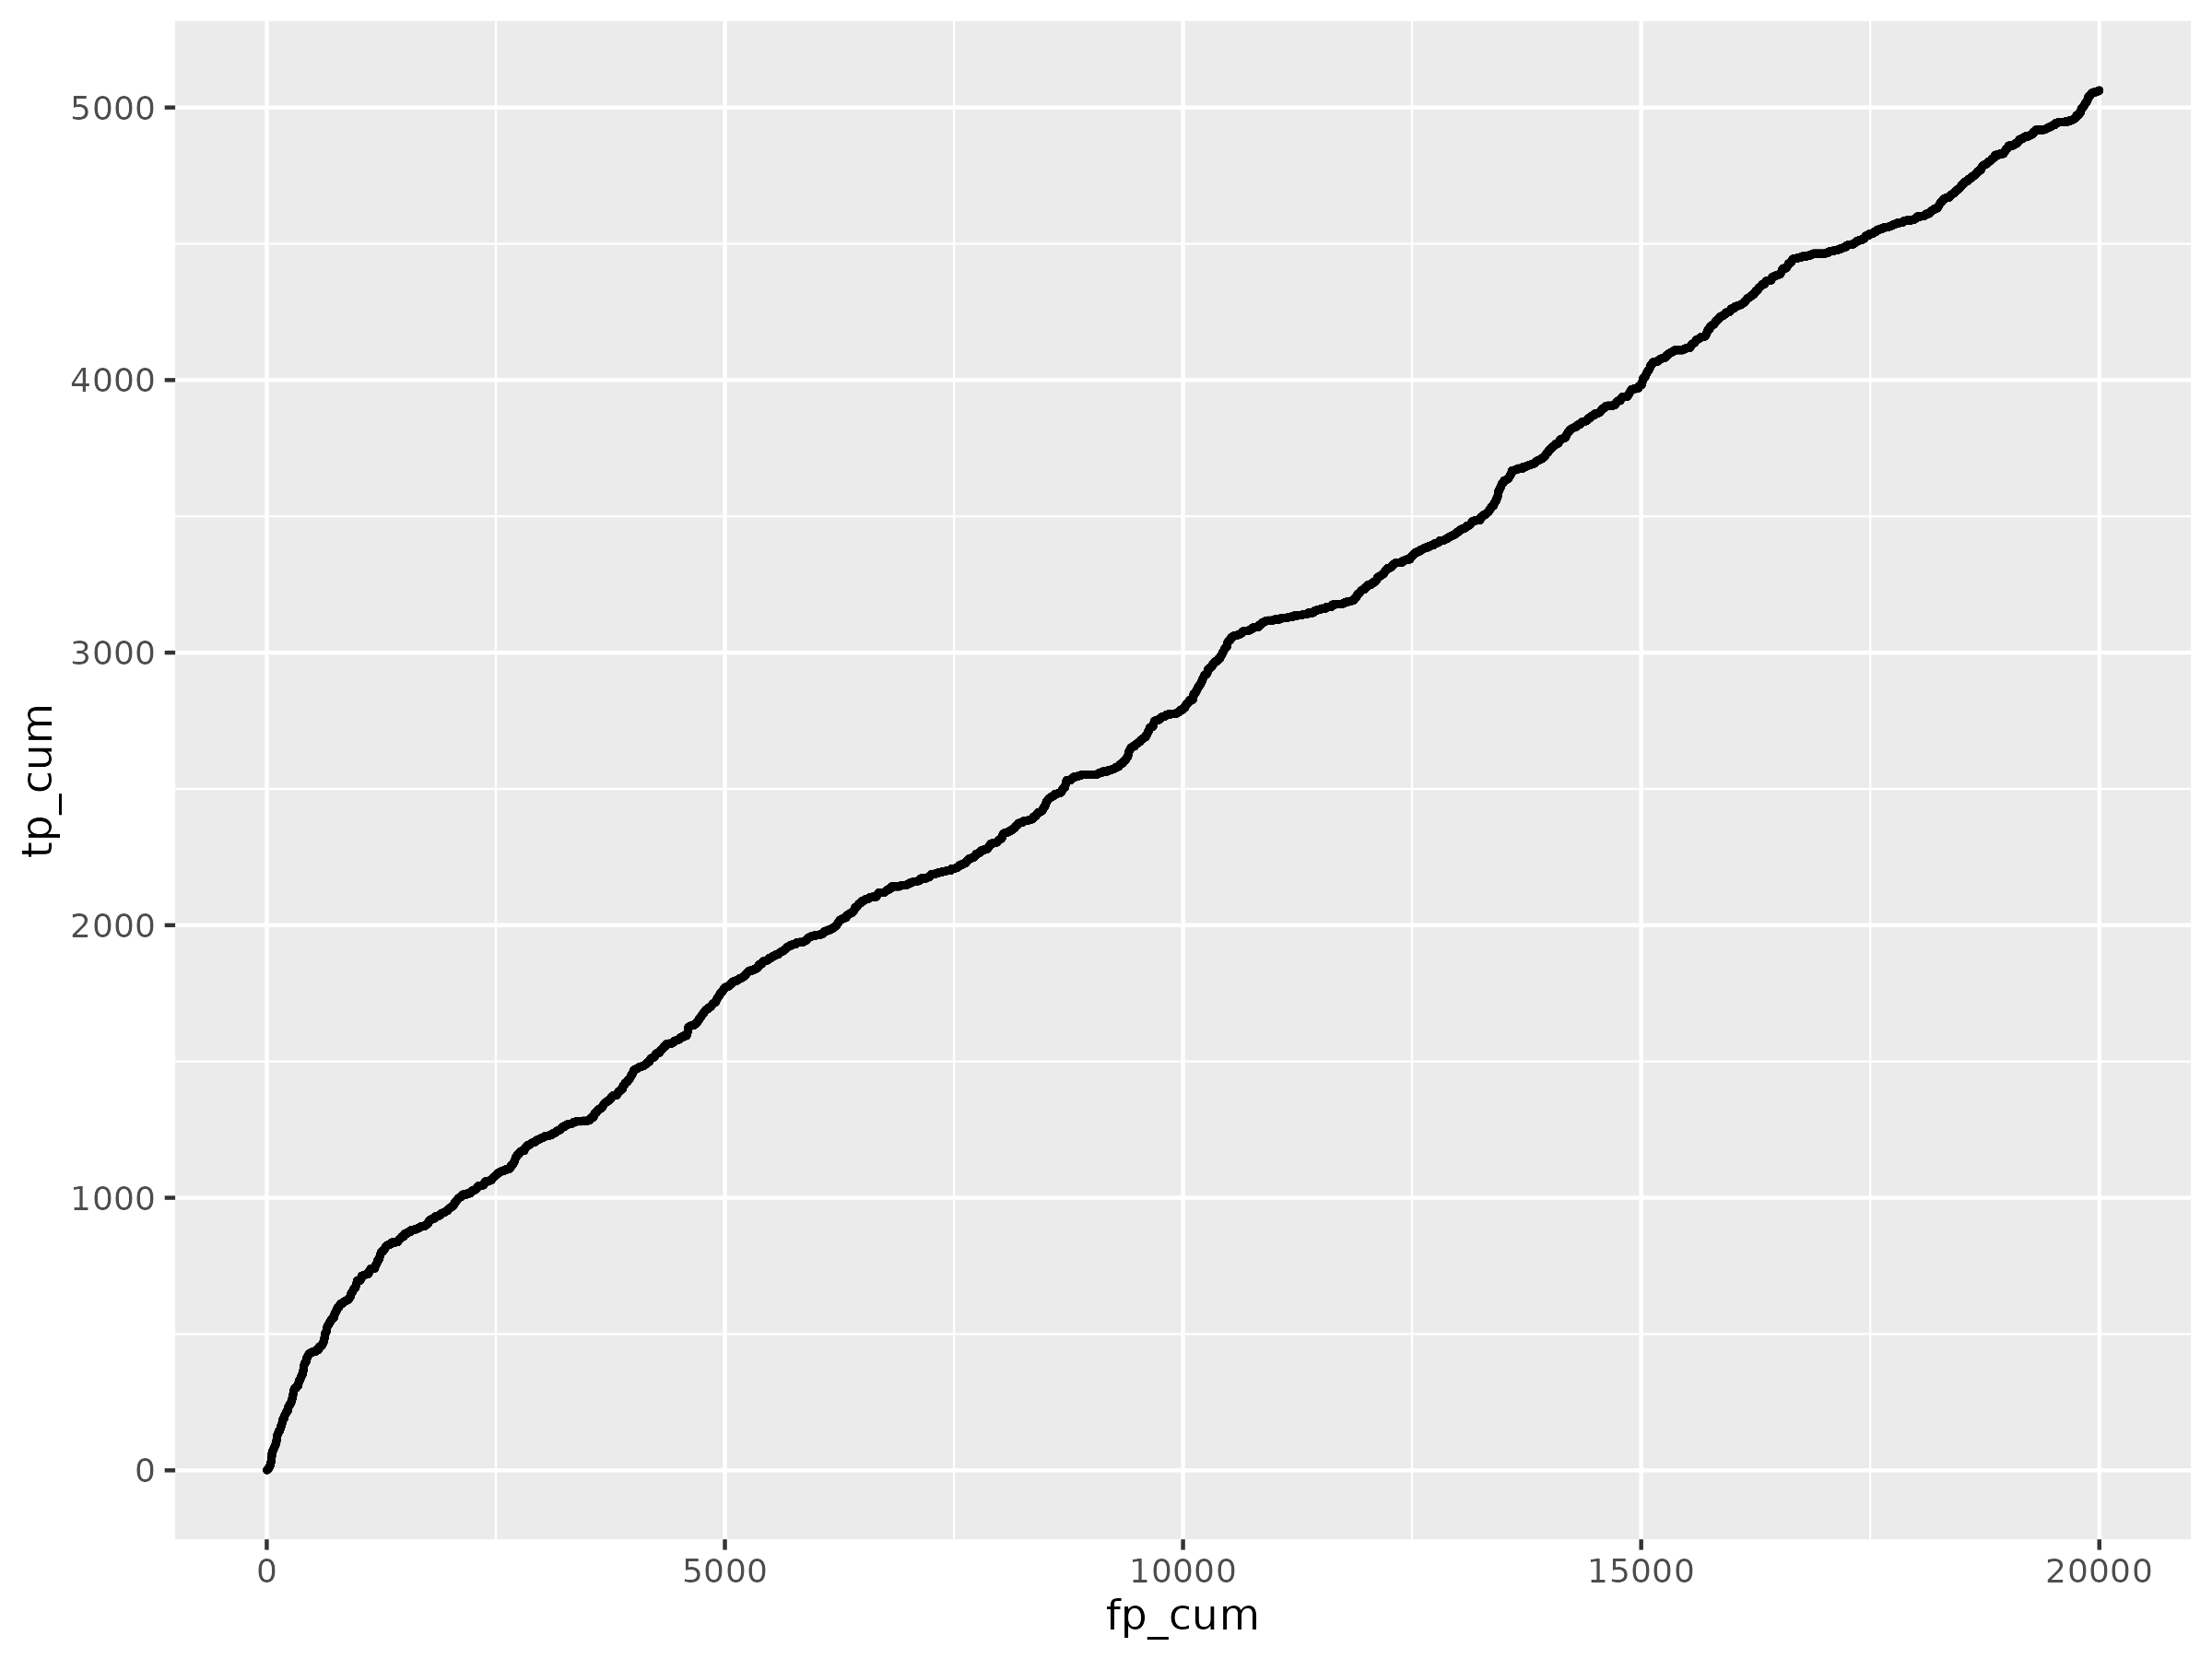

In [29]:
df = FAVA_Matrix.transpose()

# Compute the correlation matrix using Pearson correlation coefficient
corr_matrix = df.corr(method='pearson')

# Set a threshold for the correlation coefficient
threshold = 0
# Filter the correlation matrix to only include pairs with correlation coefficient above the threshold
high_corr_pairs = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()

# Rename the columns of the filtered pairs dataframe
high_corr_pairs.columns = ['Protein_1', 'Protein_2', 'Score']
Network = high_corr_pairs

Network = Network[Network['Protein_1'] != Network['Protein_2']]
Network = Network.nlargest(800000, 'Score')
#Network.to_csv('Networks//Achilles_CRISPRGeneDependency_Pearson.txt',sep='\t') # Nothing required

Network.to_csv('Pearson_GeneLog_1000H_100L_Network.txt',sep='\t')

final_network = Annot_network('Pearson_GeneLog_1000H_100L_Network.txt',"9606.protein.aliases.v11.5.txt")
final_network.to_csv('Pearson_GeneLog_1000H_100L_Network.tsv',sep='\t',header = False)

def CommandLinePearson():
    !awk -F"\t" '{print $0, "FAVA"}' 'Pearson_GeneLog_1000H_100L_Network.tsv' > tmp.tsv && mv tmp.tsv 'Dummie.tsv'
    !awk '{print $2,$3,$4,$5}' 'Dummie.tsv' > 'Dummie2.tsv'
    !python3 string_score_benchmark.py 'Dummie2.tsv' 'kegg_benchmarking.CONN_maps_in.v11.9606.tsv' 'none' > 'Benchmarked_Kegg_Pearson_PCA_GeneDep_Network.tsv'
    return
    
CommandLinePearson()

!Rscript benchmark_plot_coX.R 'Benchmarked_Kegg_Pearson_PCA_GeneDep_Network.tsv' 'Images//Benchmarked_Kegg_Pearson_GeneLog_1000H_100L_Network.tsv.png' 
from IPython.display import Image
Image('Images//Benchmarked_Kegg_Pearson_GeneLog_1000H_100L_Network.tsv.png' )

Error in library(plotly) : there is no package called ‘plotly’
Execution halted


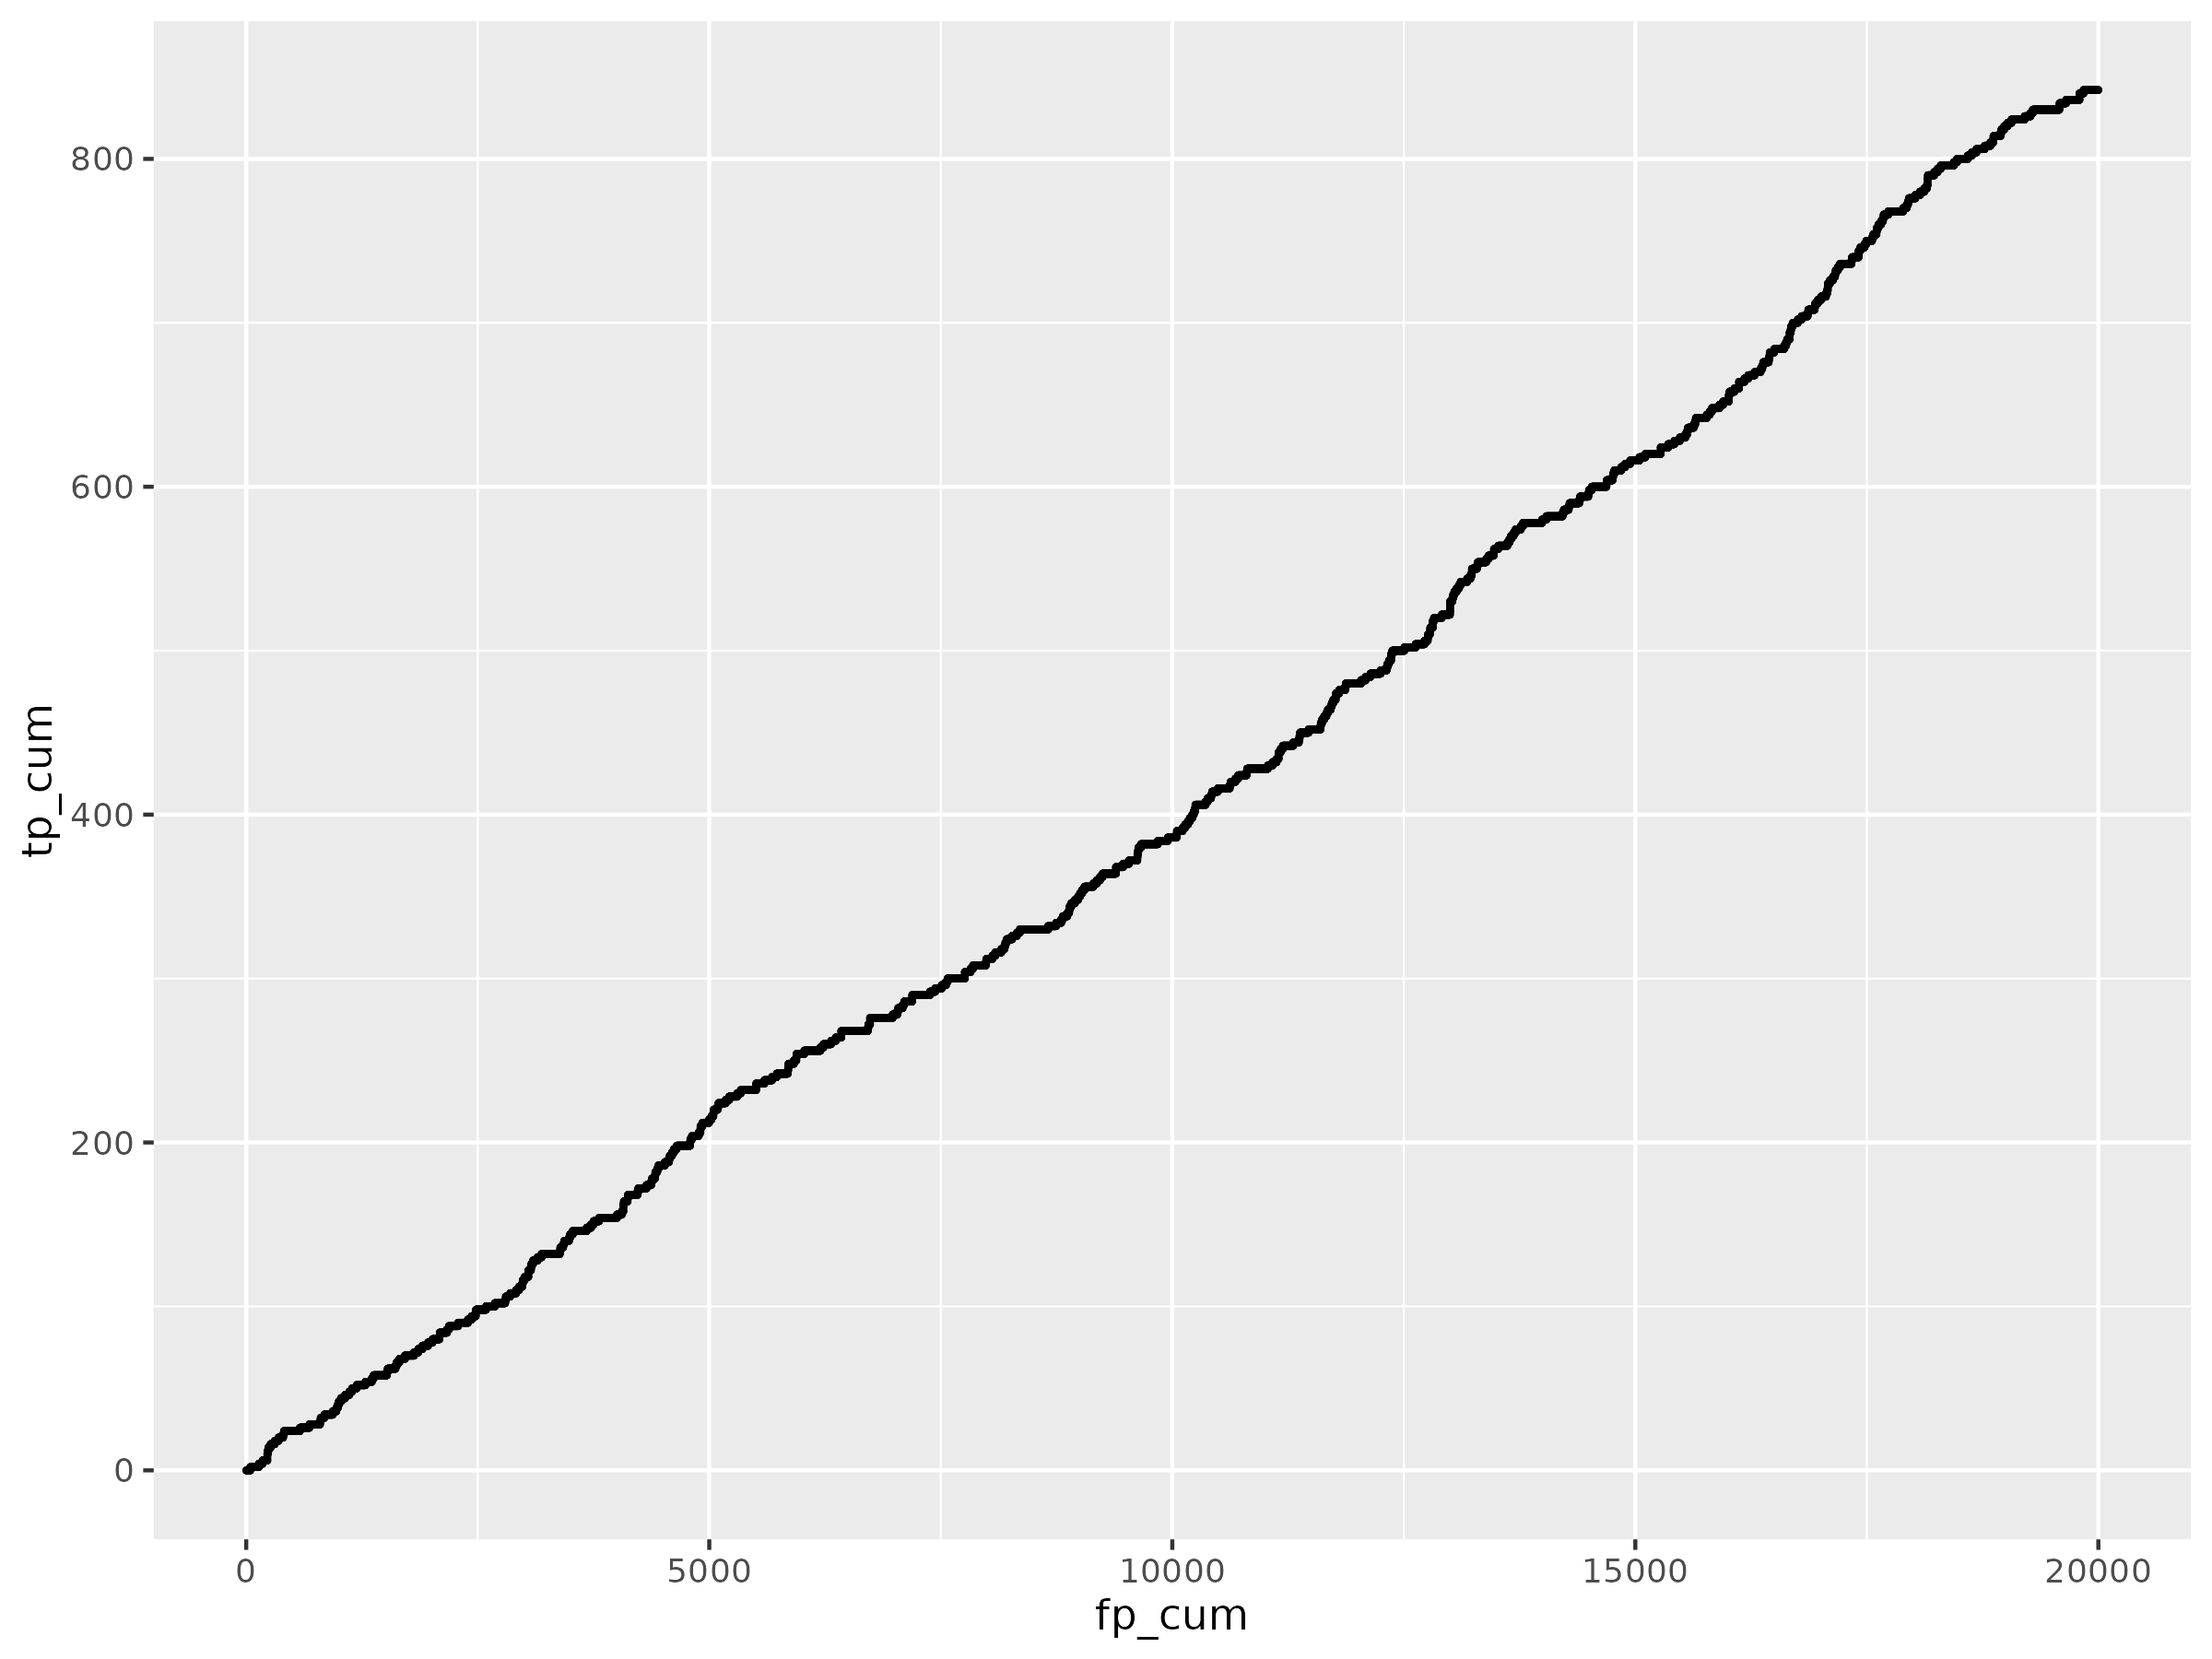

In [10]:
final_network = Annot_network('Pearson_GeneLog_1000H_100L_Network.txt',"9606.protein.aliases.v11.5.txt")
final_network.to_csv('Pearson_GeneLog_1000H_100L_Network.tsv',sep='\t',header = False)

def CommandLinePearson():
    !awk -F"\t" '{print $0, "FAVA"}' 'Pearson_GeneLog_1000H_100L_Network.tsv' > tmp.tsv && mv tmp.tsv 'Dummie.tsv'
    !awk '{print $2,$3,$4,$5}' 'Dummie.tsv' > 'Dummie2.tsv'
    !python3 string_score_benchmark.py 'Dummie2.tsv' 'kegg_benchmarking.CONN_maps_in.v11.9606.tsv' 'none' > 'Benchmarked_Kegg_Pearson_GeneLog_1000H_100L_Network.tsv'
    return
    
CommandLinePearson()

!Rscript benchmark_plot_coX.R 'Benchmarked_Kegg_Pearson_GeneLog_1000H_100L_Network.tsv' 'Images//Benchmarked_Kegg_Pearson_GeneLog_1000H_100L_Network.tsv.png' 
from IPython.display import Image
Image('Images//Benchmarked_Kegg_Pearson_GeneLog_1000H_100L_Network.tsv.png' )

#### Junk

In [ ]:
df = FAVA_Matrix.transpose()
# Compute the correlation matrix using Pearson correlation coefficient
corr_matrix = df.corr(method='pearson')

# Set a threshold for the correlation coefficient
threshold = 0

# Filter the correlation matrix to only include pairs with correlation coefficient above the threshold
high_corr_pairs = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()

# Rename the columns of the filtered pairs dataframe
high_corr_pairs.columns = ['Protein_1', 'Protein_2', 'Score']
Network = high_corr_pairs

Network = Network[Network['Protein_1'] != Network['Protein_2']]


In [ ]:
Network = Network.sort_values('Score')
Network = Network.nsmallest(400000, 'Score')
#Network.to_csv('Networks//Achilles_CRISPRGeneDependency_Pearson.txt',sep='\t') # Nothing required

Network.to_csv('Networks//Achilles_Pearson.txt',sep='\t')

final_network = Annot_network('Networks//Achilles_Pearson.txt',"STRING proteins//9606.protein.aliases.v11.5.txt")
final_network.to_csv('Networks//Homo_Sapiens.tsv',sep='\t',header = False)
CommandLinePearson()
!Rscript benchmark_plot_coX.R 'Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv' 'Roc_png//Achilles_benchmark_kegg2.png' 
from IPython.display import Image
Image("Roc_png//Achilles_benchmark_kegg2.png")

In [ ]:
!Rscript Benchmark_Plot.R 'Benchmark_Kegg_Networks//Achilles_benchmark_kegg.tsv' 'Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv' 'Roc_png//Achilles_benchmark_kegg.png' 
from IPython.display import Image
Image("Roc_png//Achilles_benchmark_kegg.png")

In [ ]:
!Rscript benchmark_plot_coX.R 'Benchmark_Kegg_Networks//Pearson_benchmark_kegg.tsv' 'Roc_png//Achilles_benchmark_kegg2.png' 
from IPython.display import Image
Image("Roc_png//Achilles_benchmark_kegg2.png")